# "Revolutionizing Concrete Strength Prediction: With an Emphasis on Total Water, Aggregates, Admixtures, and Slump Properties"

# Introduction

Concrete's strength is determined by testing samples of wet concrete during construction. The test involves applying controlled pressure to a sample until it breaks, revealing its compressive strength. 

Different construction structures require specific strength values. **Testing** is time-consuming, costly, and prone to errors, causing delays. A machine Learning approach can be used to predict concrete strength by analyzing past composition and strength data. This approach will save time, resources, and minimizes delays.

**Advanced Construction Technology Services (ACTS)** is seeking to implement machine learning techniques to automate the compressive strength testing process. Once successfully integrated, this machine learning approach will be extended to encompass all their projects spanning the Middle East and Gulf region. This strategic move underscores **ACTS'** commitment to cutting-edge technology for enhanced efficiency and sustainability in construction endeavors.


# Context 

This research paper involves analyzing a concrete strength dataset comprising **940** actual samples. These samples represents a diverse range of concrete mixes utilized in pojects across Lebanon. Multiple machine learning models are employed to conduct estimations. The study primarily focused on comparing the consistency and accuracy of these estimation methods. It's noteworthy that in existing literature, both **ANN** and **decision tree** models have been extensively employed for estimating concrete compressive strength.


# Background

Previous research has primarily focused on developing machine learning models using data that incorporates SSD (Saturated Surface Dry) measurements, which capture the moisture state of aggregates when they are saturated but without any surface water.

In contrast, this research uniquely forecasts the strength of concrete **without** relying on the **water-cement ratio** derived from SSD values. Instead, it emphasizes the overall **total water content**, independent of the aggregate's moisture state. It also depends on the quantities of cement,  different aggregates weight, absorption rates, and admixtures. Furthermore, the data encompasses both the weight and the air content measured during testing. This approach provides a distinct perspective compared to traditional methods that lean heavily on **SSD measurements**.


# Objectives

The main objective of this project is to predict the compressive strength of concrete by undertaking the following essential tasks:

1. Data Preprocessing and Exploration:
    1. Data Cleaning: Missing Values Handling
    2. Exploratory Data Analysis (EDA): Utilize statistical analysis and visualization techniques.
    3. Feature Selection
2. Model Selection and Training:
    1. Model Selection: Determine appropriate machine learning algorithms for the regression task (Common machine learning algorithms used for regression tasks include Linear Regression, Decision Trees, Random Forests, Gradient Boosting methods, Support Vector Regression, and others.
    2. Model Training
3. Model Evaluation and Optimization:
    1. Performance Evaluation: Validate the model's performance using a separate validation set and suitable evaluation metrics 
    2. Hyperparameter Tuning: Optimize the model's performance through Azure Drive or manual tuning.
    3. Feature Importance: Assess the importance of each mix design variable in predicting compressive strength.
4. Model Testing:
    1. Test: Evaluate the final model using a separate test dataset that was not utilized during training or validation.
    2. Result Interpretation: Interpret the test results and compare them with the initial performance expectations.

# Importing necessary libraries and loading the data

In [1]:
#!pip install xxhash
#!pip install impyute
#!pip install fancyimpute
#!pip install SHAP
#!pip install seaborn
#!pip install openpyxl
#!pip install Jinja2
#!pip show shap
#!pip install shap
#!pip install tabulate
#!pip install torch
#!pip install tensorflow
#!pip install CatBoost

In [2]:
# Standard Libraries
%matplotlib inline
import os
import pickle

In [3]:
# Data Science Libraries: 
import torch
import scipy
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Data Reprocessing 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer

In [5]:
# Model related imports 
import xgboost as xgb
import torch.nn as nn
import lightgbm as lgb
import torch.optim as optim
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [6]:
# Model Evaluation & Metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# HyperParameters Tuning & Regularization
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [8]:
# Others
import csv
from tabulate import tabulate

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the autoreload extension to automatically reload modules when they change
%load_ext autoreload
%autoreload 2
import model_utils

# Meet and Greet the Dataset

In the Concrete Dataset, the Civil Engineer adopted a distinctive method to signify missing information. They used the **"-"** symbol to denote null entries in columns where data wasn't captured or documented. Moreover, **blank cells** indicated the non-inclusion of certain ingredients in the concrete mixture for specific projects.

They also incorporated dummy columns to flag the presence or non-presence of specific ingredients in the mix.

**Measurements:**

Cement Batch mass                    (kg/m3)      
Cement Type                          (kg/m3)      
Water Batch mass                     (kg/m3)      
**Coarse Aggregate Yes/No**          (to be deleted)          
Coarse Aggregate Batch mass          (kg/m3)      
Coarse Aggregate Absorption          (%)        
Coarse Aggregate Moisture Content    (%)       
**Medium Aggregate Yes/No**          (to be deleted)               
Medium Aggregate Batch mass          (kg/m3)      
Medium Aggregate Absorption          (%)          
Medium Aggregate Moisture Content    (%)          
**Crushed Sand Yes/No**              (to be deleted)                
Crushed Sand Batch mass              (kg/m3)      
Crushed Sand Absorption              (%)          
Crushed Sand Moisture Content        (%)          
**Natural Sand Yes/No**              (to be deleted)               
Natural Sand Batch mass              (kg/m3)      
Natural Sand Absorption              (%)        
Natural Sand Moisture Content        (%)        
High Range Water Reducer Batch mass  (kg/m3)      
Retarder Batch mass                  (kg/m3)      
Slump                                (mm)         
Concrete Temperature                 (ᵒC)         
Unit Weight                          (kg/m3)      
Air Content                          (%)       

In [11]:
# Read the configuration file
config_file = model_utils.read_config_file()

# Read the Excel file
df = model_utils.load_data(config_file['file_path'])

# Set configuration to show all data info of the dataframe 
pd.set_option('display.max_columns', None) 

print(f"Total columns: {df.shape[1]} and Total rows: {df.shape[0]}")

print("Check if i have loaded well all data: ... ")
df.head()

Total columns: 26 and Total rows: 940
Check if i have loaded well all data: ... 


,Cement Batch mass,Cement Type,Water Batch mass,Coarse Aggregate (Yes/No),Coarse Aggregate Batch mass,Coarse Aggregate Absorption,Coarse Aggregate Moisture Content,Medium Aggregate (Yes/No),Medium Aggregate Batch mass,Medium Aggregate Absorption,Medium Aggregate Moisture Content,Crushed Sand (Yes/No),Crushed Sand Batch mass,Crushed Sand Absorption,Crushed Sand Moisture Content,Natural Sand (Yes/No),Natural Sand Batch mass,Natural Sand Absorption,Natural Sand Moisture Content,High Range Water Reducer Batch mass,Retarder Batch mass,Slump,Concrete Temperature,Unit Weight,Air Content,28 days Compressive Strength
0,301,PRMS 42.5,110.0,1,594.0,1,1,1,340.0,0.9,1,1,487.0,2,1,1,572.0,2.2,7.5,6.12,0.00,180,25,-,-,31.987359
1,302,PRMS 42.5,122.0,1,592.0,1.00,1.00,1,339.0,0.90,1.00,1,490.0,2.00,1.00,1,557.0,2.20,5.50,6.15,0.00,185,22.5,2370,2.6,35.193743
2,302,PRMS 42.5,120.0,1,590.0,1.00,1.00,1,341.0,0.90,1.00,1,486.0,2.00,1.00,1,547.0,2.20,5.75,6.13,0.00,205,22.0,-,-,31.123822
3,300,PRMS 42.5,119.0,1,594.0,1.00,1.00,1,333.0,0.90,1.00,1,488.0,2.00,1.00,1,558.0,2.20,6.00,6.13,0.00,230,22.5,-,-,33.739110
4,379,White Cement,148.0,1,593.0,1.00,1.00,1,273.0,1.30,2.00,1,1014.0,1.80,3.00,0,0.0,NaN,NaN,6.62,1.88,230,24.0,2400,1.9,49.936835


# Data preprocessing: Handling missing, unexisted data, columns with unique values, variable coercing and new features creation

In [12]:
# Check for missing valus which represents the inexistance of specific ingredients in the mix
# Count NAN values for each column
print("How many NAN values do we have in each column?")
df.isnull().sum()

How many NAN values do we have in each column?


Cement Batch mass                        0
Cement Type                              0
Water Batch mass                         0
Coarse Aggregate (Yes/No)                0
Coarse Aggregate Batch mass              0
Coarse Aggregate Absorption            219
Coarse Aggregate Moisture Content      219
Medium Aggregate (Yes/No)                0
Medium Aggregate Batch mass              0
Medium Aggregate Absorption              1
Medium Aggregate Moisture Content        0
Crushed Sand (Yes/No)                    0
Crushed Sand Batch mass                  0
Crushed Sand Absorption                  1
Crushed Sand Moisture Content            0
Natural Sand (Yes/No)                    0
Natural Sand Batch mass                  0
Natural Sand Absorption                335
Natural Sand Moisture Content          335
High Range Water Reducer Batch mass      0
Retarder Batch mass                      0
Slump                                    1
Concrete Temperature                     0
Unit Weight

In [13]:
# Check for missing value Represented by the hyphen ("-")
# Count hyphen values for each column
df.eq("-").sum()

Cement Batch mass                        0
Cement Type                              0
Water Batch mass                         0
Coarse Aggregate (Yes/No)                0
Coarse Aggregate Batch mass              0
Coarse Aggregate Absorption             63
Coarse Aggregate Moisture Content       63
Medium Aggregate (Yes/No)                0
Medium Aggregate Batch mass              0
Medium Aggregate Absorption             63
Medium Aggregate Moisture Content       63
Crushed Sand (Yes/No)                    0
Crushed Sand Batch mass                  0
Crushed Sand Absorption                 63
Crushed Sand Moisture Content           63
Natural Sand (Yes/No)                    0
Natural Sand Batch mass                  0
Natural Sand Absorption                 64
Natural Sand Moisture Content           63
High Range Water Reducer Batch mass      0
Retarder Batch mass                      0
Slump                                   10
Concrete Temperature                     9
Unit Weight

In [14]:
# Execute the function to impute values
#Impute missing values represented by hyphen ("-") using KNNImputer while keeping original NaN values. Steps:
#1.- Replace data represented by hyphen ("-") with np.nan
#2.- Impute missing values using KNNImputer
#3.- Convert the imputed data back to a DataFrame
#4.- Restore the original NaN values
imputed_df = model_utils.impute_hyphen_and_keep_nan(df)

In [15]:
# Verify there are not hyphens ("-")
print(imputed_df.eq("-").sum())

Cement Batch mass                      0
Water Batch mass                       0
Coarse Aggregate (Yes/No)              0
Coarse Aggregate Batch mass            0
Coarse Aggregate Absorption            0
Coarse Aggregate Moisture Content      0
Medium Aggregate (Yes/No)              0
Medium Aggregate Batch mass            0
Medium Aggregate Absorption            0
Medium Aggregate Moisture Content      0
Crushed Sand (Yes/No)                  0
Crushed Sand Batch mass                0
Crushed Sand Absorption                0
Crushed Sand Moisture Content          0
Natural Sand (Yes/No)                  0
Natural Sand Batch mass                0
Natural Sand Absorption                0
Natural Sand Moisture Content          0
High Range Water Reducer Batch mass    0
Retarder Batch mass                    0
Slump                                  0
Concrete Temperature                   0
Unit Weight                            0
Air Content                            0
28 days Compress

In [16]:
# Check to confirm the original NAN values are restored
print("After applying the function , we should have imputed the hyphen while we restored all NAN values...")
imputed_df.isnull().sum()

After applying the function , we should have imputed the hyphen while we restored all NAN values...


Cement Batch mass                        0
Water Batch mass                         0
Coarse Aggregate (Yes/No)                0
Coarse Aggregate Batch mass              0
Coarse Aggregate Absorption            219
Coarse Aggregate Moisture Content      219
Medium Aggregate (Yes/No)                0
Medium Aggregate Batch mass              0
Medium Aggregate Absorption              1
Medium Aggregate Moisture Content        0
Crushed Sand (Yes/No)                    0
Crushed Sand Batch mass                  0
Crushed Sand Absorption                  1
Crushed Sand Moisture Content            0
Natural Sand (Yes/No)                    0
Natural Sand Batch mass                  0
Natural Sand Absorption                335
Natural Sand Moisture Content          335
High Range Water Reducer Batch mass      0
Retarder Batch mass                      0
Slump                                    1
Concrete Temperature                     0
Unit Weight                              0
Air Content

In [17]:
# Count unique values for each column
imputed_df.nunique().sort_values(ascending=True)

Crushed Sand (Yes/No)                    1
Medium Aggregate (Yes/No)                1
Coarse Aggregate (Yes/No)                2
Natural Sand (Yes/No)                    2
Coarse Aggregate Absorption              2
Natural Sand Absorption                  3
Medium Aggregate Absorption              3
Crushed Sand Absorption                  4
Cement Type                              5
Concrete Temperature                    34
Slump                                   45
Coarse Aggregate Batch mass             69
Natural Sand Moisture Content           95
Coarse Aggregate Moisture Content      100
Cement Batch mass                      101
Air Content                            103
Water Batch mass                       112
Medium Aggregate Moisture Content      113
Natural Sand Batch mass                123
Retarder Batch mass                    128
Unit Weight                            163
Crushed Sand Moisture Content          174
High Range Water Reducer Batch mass    206
Medium Aggr

In [18]:
# drop the dummy columns which created to signify the presence/non presence of specifc ingredients 
columns_to_drop_dummy_variables = ['Medium Aggregate (Yes/No)',
                                   'Natural Sand (Yes/No)',
                                   'Coarse Aggregate (Yes/No)',
                                   'Crushed Sand (Yes/No)']
imputed_df = imputed_df.drop(columns=columns_to_drop_dummy_variables, axis=1)

In [19]:
# Also, drop the columns that have low feature importance resulted after we  ran the models 
columns_to_drop_feature_impotance = ['Medium Aggregate Absorption ',
                                   'Coarse Aggregate Absorption ',
                                   'Crushed Sand Absorption ',
                                   'Natural Sand Absorption ',
                                  ]
imputed_df = imputed_df.drop(columns=columns_to_drop_feature_impotance, axis=1)

In [20]:
# One-hot encode the 'Cement Type' column
dummies_df = pd.get_dummies(imputed_df['Cement Type'], drop_first=False)

# Drop the original 'Cement Type' column from the original DataFrame
imputed_df = imputed_df.drop('Cement Type', axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
imputed_df = pd.concat([imputed_df, dummies_df], axis=1)

In [21]:
# Convert object columns to numbers (if applicable)
for col in imputed_df.columns:
    if imputed_df[col].dtype == 'object':
        imputed_df[col] = pd.to_numeric(df[col], errors='coerce') # coerce: any errors during the coversion to be replaced with NAN

In [22]:
# Feature Engineering : New variables creation
# Adding a new column "water/cement ratio" with calculated values
imputed_df['water/cement ratio'] = imputed_df['Water Batch mass'] / imputed_df['Cement Batch mass ']

# Adding a new column "fine/coarse ratio" with calculated values
imputed_df['fine/coarse ratio'] = (imputed_df['Crushed Sand Batch mass'] + imputed_df['Natural Sand Batch mass']) / (imputed_df['Medium Aggregate Batch mass'] + imputed_df['Coarse Aggregate Batch mass'])

# Adding a new column "Cement Log" with calculated values
imputed_df['Cement Log'] = np.log(imputed_df['Cement Batch mass '])

# Adding a new column "Aggregates/Cement" with calculated values
imputed_df['Aggregates/cement ratio'] = (imputed_df['Crushed Sand Batch mass'] + imputed_df['Natural Sand Batch mass'] + imputed_df['Medium Aggregate Batch mass'] + imputed_df['Coarse Aggregate Batch mass']) / imputed_df['Cement Batch mass ']

# Data Exploration:

### Exploratory Data Analysis(EDA)

- Check data statistical summary
- Check variable correlation
- Check univariate and bivariate distribution of various variable

### Data statistical summary

In [23]:
imputed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement Batch mass,940.0,379.744681,46.587679,280.000000,353.000000,393.000000,418.000000,480.000000
Water Batch mass,940.0,129.272340,29.898627,55.000000,106.000000,120.000000,162.000000,181.000000
Coarse Aggregate Batch mass,940.0,451.674255,249.590845,0.000000,563.750000,583.000000,592.000000,920.000000
Coarse Aggregate Moisture Content,721.0,1.115978,0.547868,0.000000,0.738000,1.000000,1.400000,2.700000
Medium Aggregate Batch mass,940.0,412.392766,197.711466,207.000000,310.750000,335.000000,408.000000,913.000000
Medium Aggregate Moisture Content,940.0,1.497123,0.768325,0.500000,0.920000,1.250000,1.890000,7.150000
Crushed Sand Batch mass,940.0,670.537340,285.289705,330.000000,462.000000,492.000000,1023.000000,1155.000000
Crushed Sand Moisture Content,940.0,2.399951,1.408300,0.000000,1.500000,2.000000,3.000000,7.600000
Natural Sand Batch mass,940.0,356.144787,271.048886,0.000000,0.000000,542.000000,563.000000,847.000000
Natural Sand Moisture Content,605.0,7.282109,1.571989,0.000000,6.000000,7.500000,8.000000,13.170000


Let's interpret some of these columns and their statistical properties:

- **Coarse Aggregate Batch Mass:** The mean batch mass seems to be reasonable, but there is a relatively high standard deviation, suggesting some variability in the batch masses.
- **Coarse Aggregate Moisture Content:** there are missing values indicated by the count. The moisture content shows some variation, with relatively high quartile values.
- **Medium Aggregate Batch Mass:** The mean and quartile values appear consistent, but there's a relatively high standard deviation, indicating variability in batch masses.
- **Medium Aggregate Absorption:** There's missing data, as indicated by the count. The quartile values appear consistent.
- **Medium Aggregate Moisture Content:** Similar to absorption, there are missing values. The moisture content shows some variability, with higher quartile values.
- **Crushed Sand Batch Mass:** The mean batch mass appears reasonable, but there's a relatively high standard deviation, suggesting variability in batch masses.
- **Crushed Sand Absorption:** Similar to previous cases, there are missing values. Absorption values seem consistent.
- **Crushed Sand Moisture Content:** Similar to absorption, there are missing values. The moisture content values show some variability.
- **Natural Sand Batch Mass:** There are zero values in the minimum and 25th percentile, which might indicate missing data or outliers. The mean batch mass appears lower compared to others.
- **Natural Sand Moisture Content:** There are missing values. The moisture content values show some variability.
- **Retarder Batch Mass:** High standard deviation along with quartile values might indicate significant variability in batch masses, but the presence of zeros might suggest data recording issues.
- **Slump:** The mean slump value seems reasonable, but there's a wide range of values, indicating variability in slump measurements.
- **Concrete Temperature:** The mean temperature appears reasonable, but there's some variability indicated by the standard deviation.
- **Unit Weight:** The unit weight values seem consistent, with a low standard deviation.
- **Air Content:** The air content values seem consistent, with quartiles around the same value.
- **28 days Compressive Strength:** The compressive strength values appear reasonable, with a wide range of values indicating varying concrete strength.

### Correlation analysis

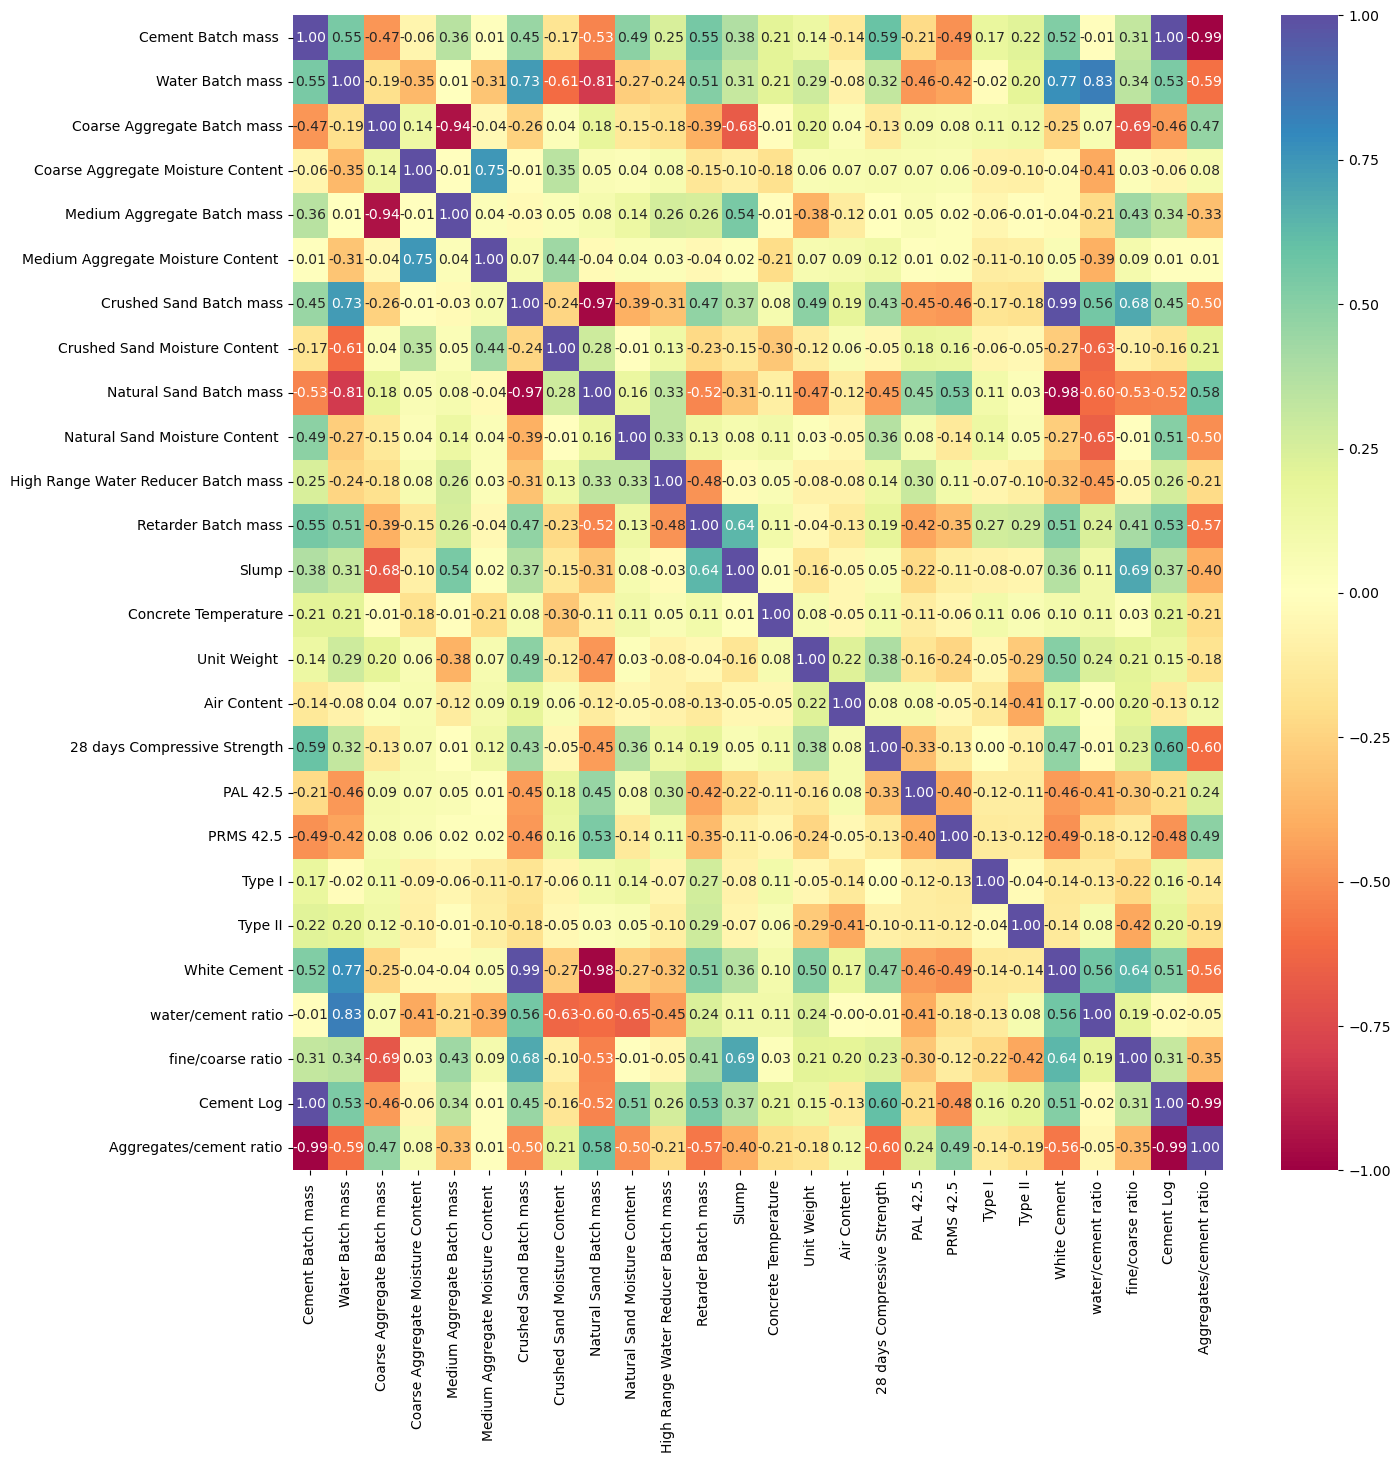

In [24]:
# Exclude non-numeric columns
numeric_columns = imputed_df.select_dtypes(include=[np.number])

# Calculate correlation and create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_columns.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Univariate anlysis: Check data distribution for each variable

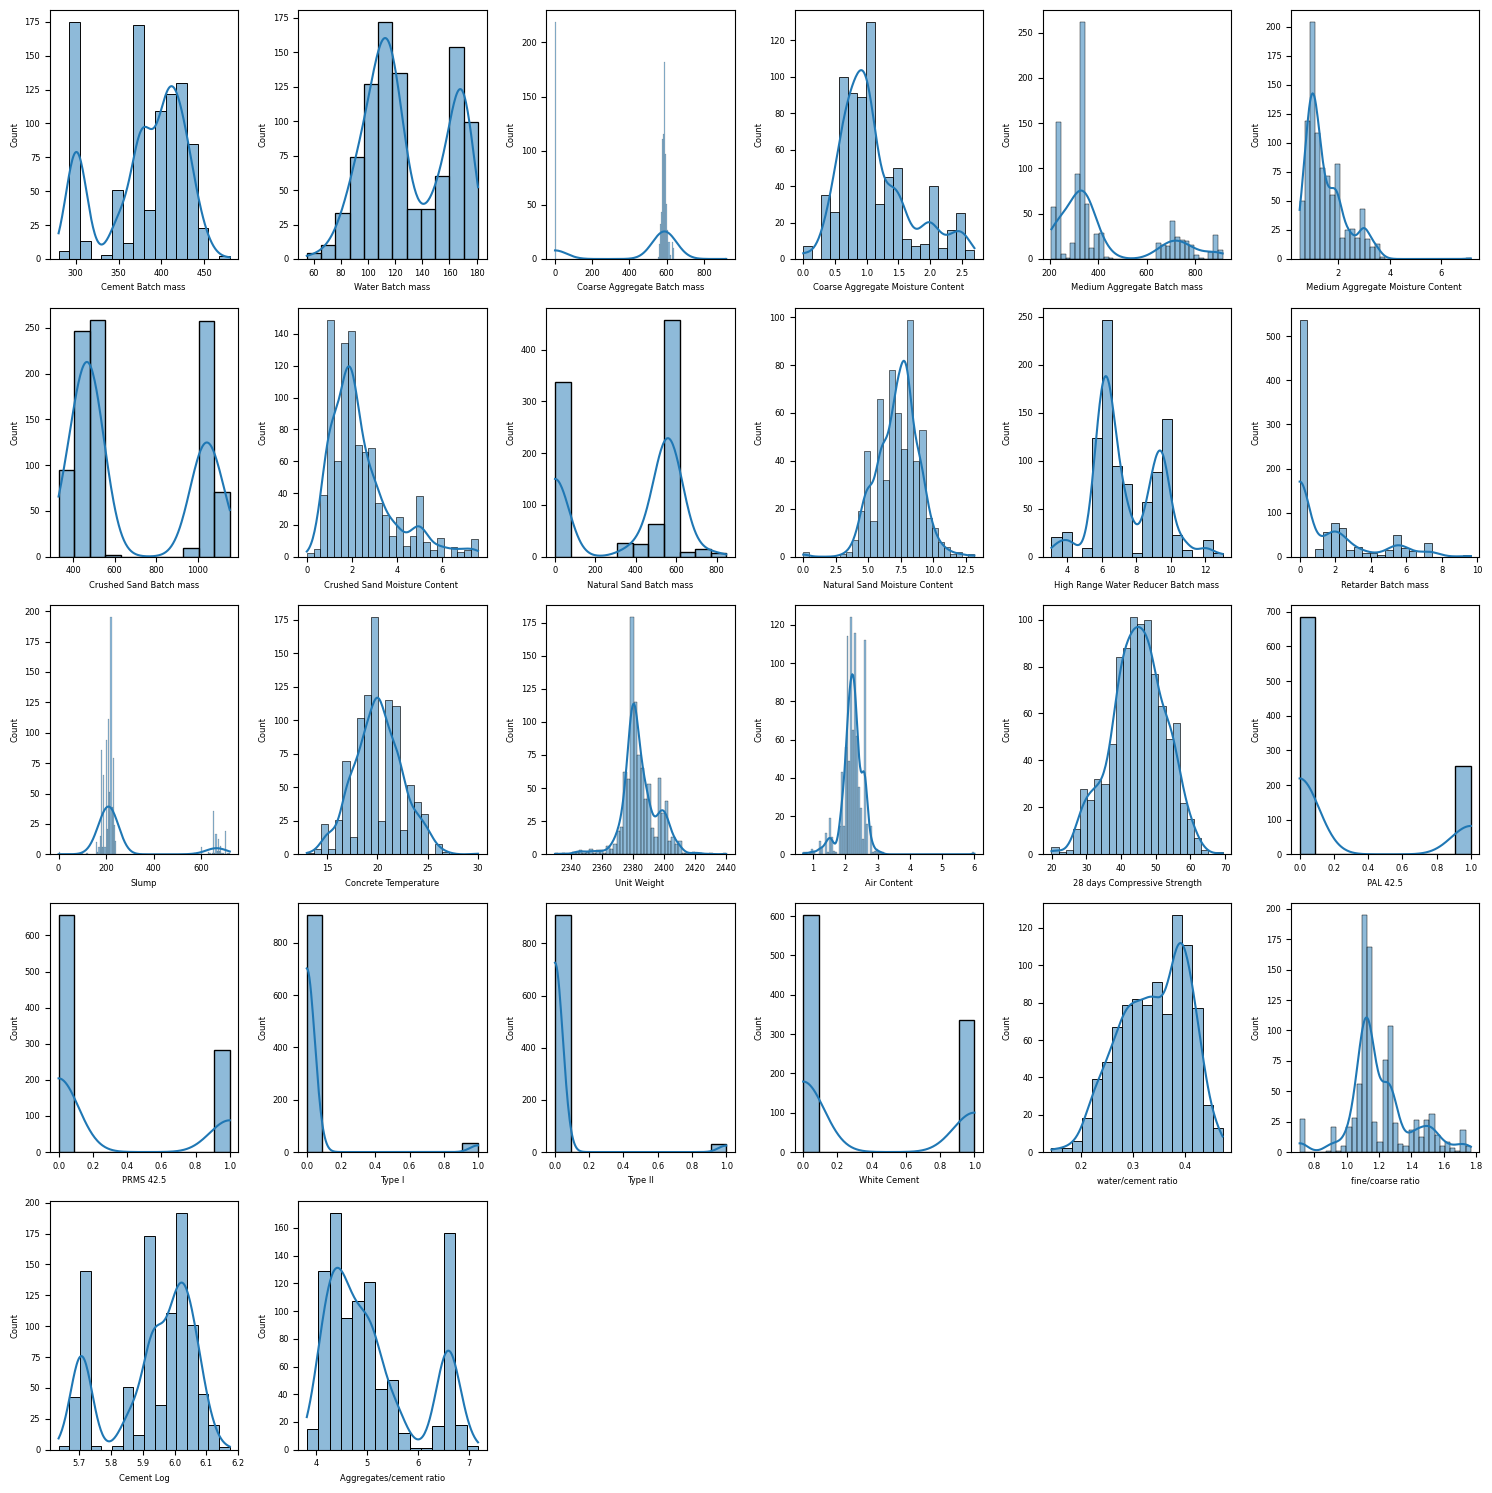

In [25]:
# Create the subplots
fig, axes = plt.subplots(ncols=6, nrows=5, figsize=(15, 15))

# Set the font size for the plot
plt.rcParams['font.size'] = 9

# Plot the distribution of each column in 'df' in the subplots
for i, ax in zip(range(imputed_df.shape[1]), axes.flat):
    sns.histplot(imputed_df.iloc[:, i], ax=ax, kde=True)

    # Set font size for axis labels
    ax.set_xlabel(ax.get_xlabel(), fontsize=6)
    ax.set_ylabel(ax.get_ylabel(), fontsize=6)

    # Set font size for tick labels on both x and y axes
    ax.tick_params(axis='both', which='both', labelsize=6)

    # Set font size for title
    ax.set_title(ax.get_title(), fontsize=6)

# Remove empty subplots
for i in range(len(axes.flat)):
    if i >= df.shape[1]:
        fig.delaxes(axes.flat[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Bivariate analysis

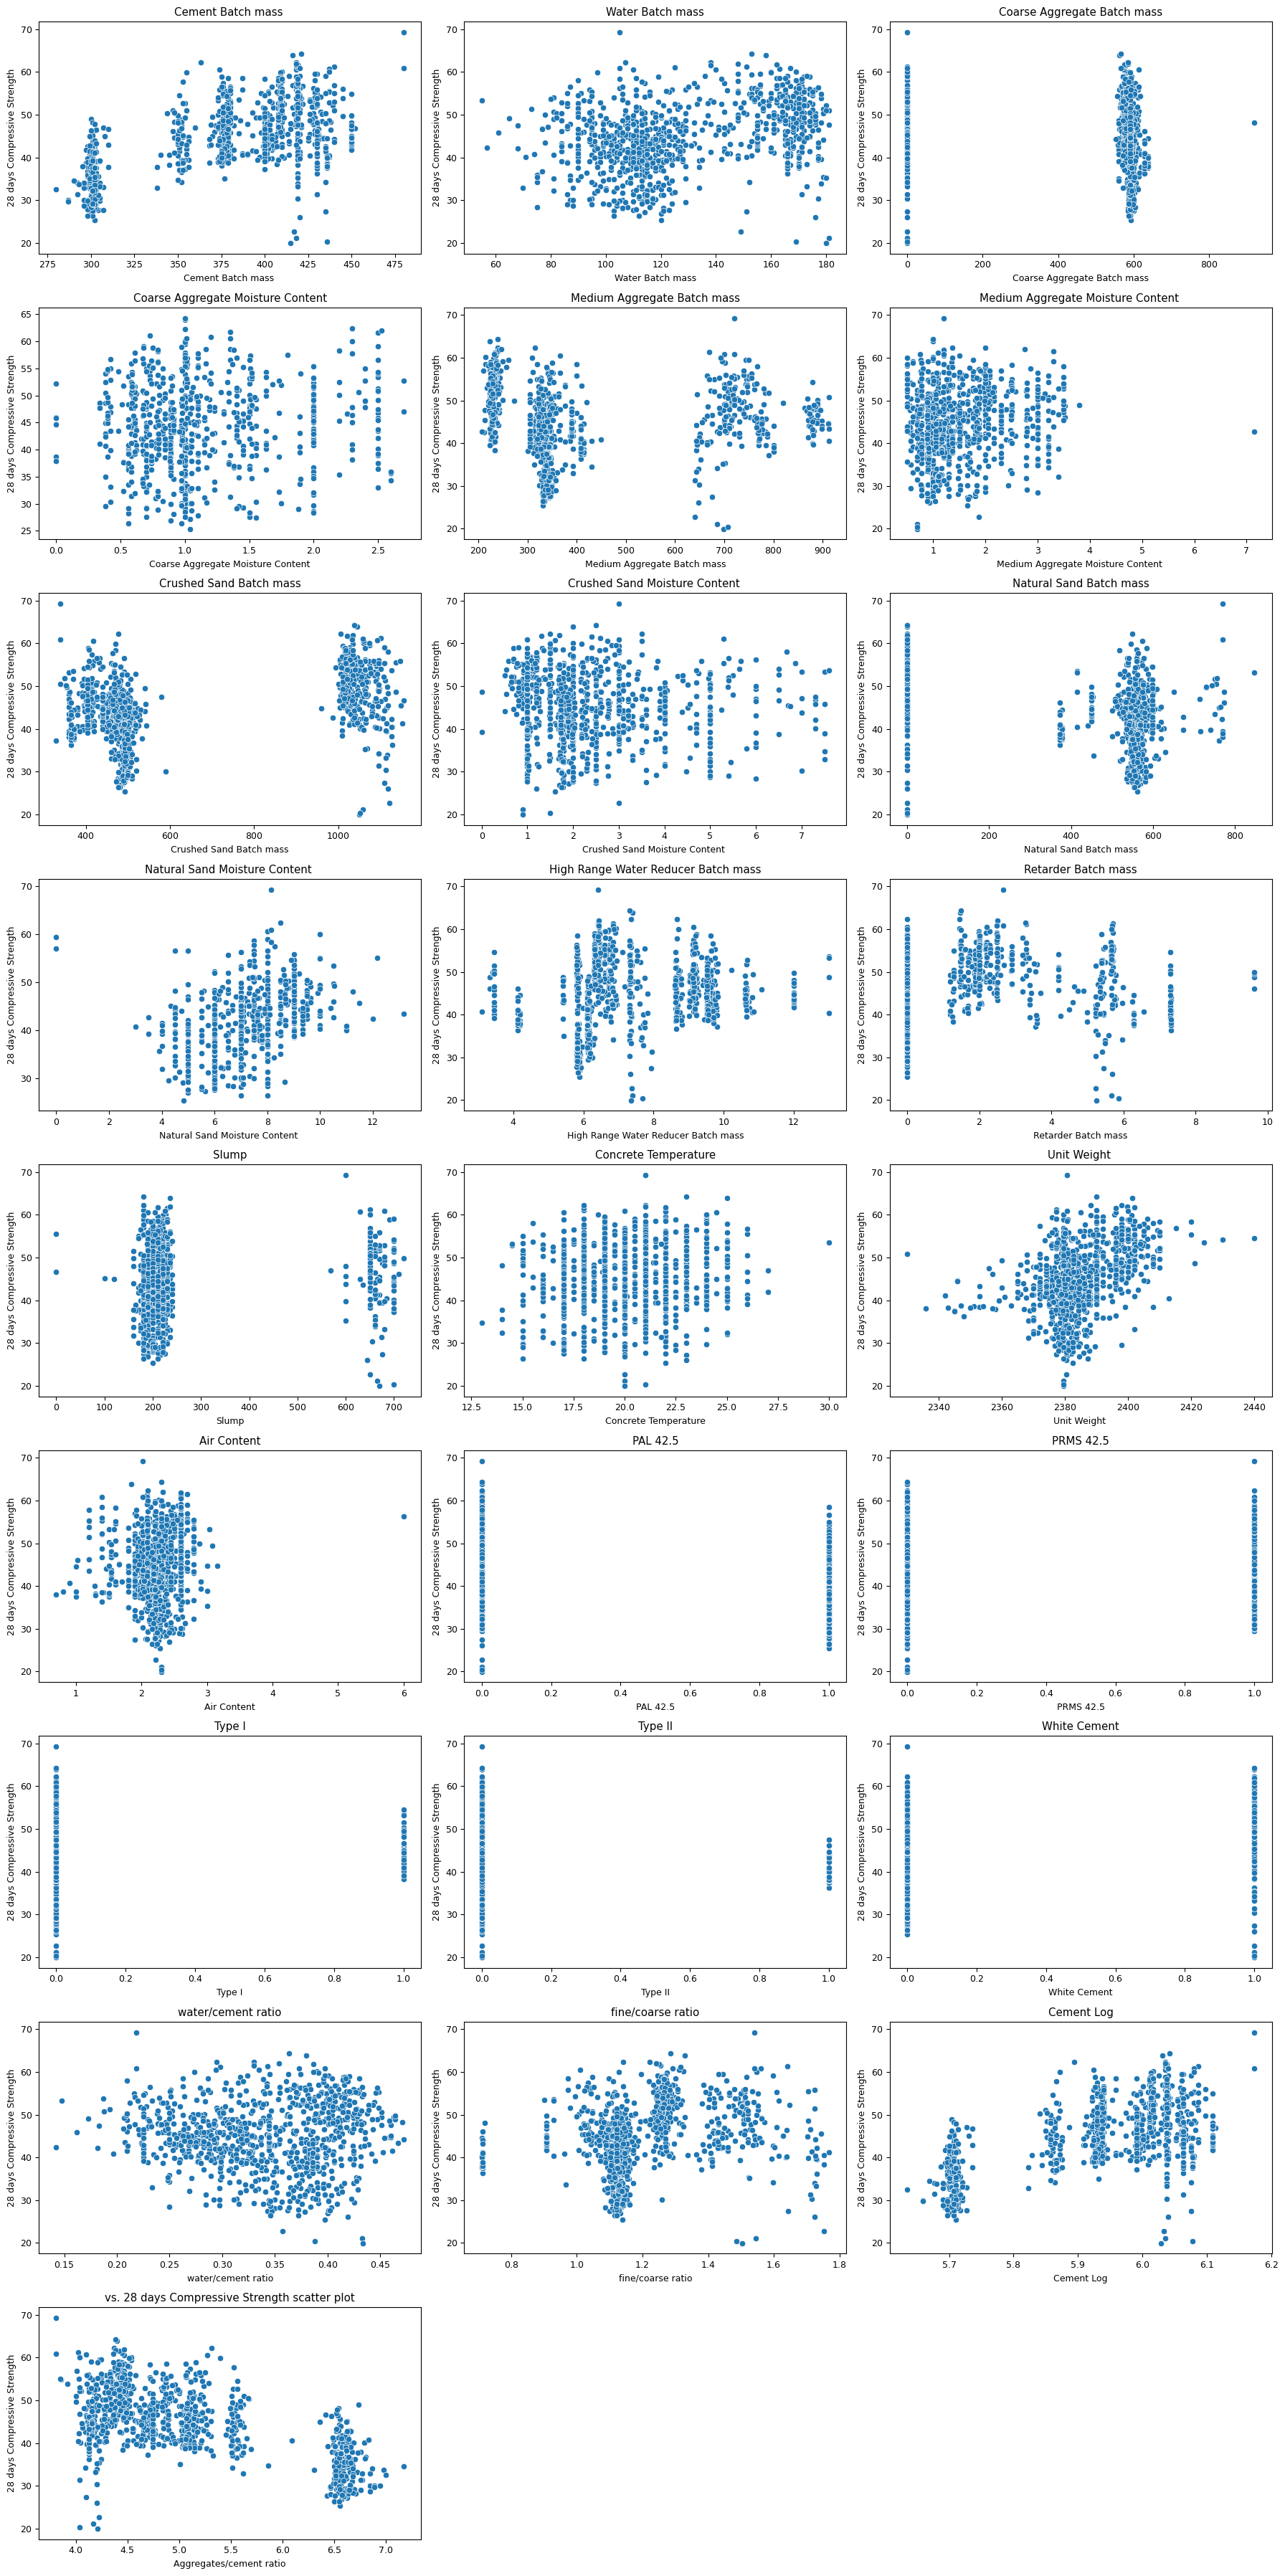

In [26]:
#Bivariate analysis is used to find out the relationship between two sets of values.(X&Y)
#it provides information about the distribution which gives in-depth picture of empirical relationships between variables.

numerical_cols = (imputed_df.select_dtypes(include="number").drop("28 days Compressive Strength", axis=1).columns)

# Calculate the number of rows needed for the subplot grid
# Add 2 to ensure at least 1 row
num_rows = (len(numerical_cols) + 2) // 3

# Create subplots with 3 columns
fig, axs = plt.subplots(num_rows, 3, figsize=(18, 4 * num_rows))

# Flatten the 2D axs array for easier iteration
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(data=imputed_df, x=col, y="28 days Compressive Strength", ax=axs[i])
    axs[i].set_title(f"{col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("28 days Compressive Strength")

fig.delaxes(axs[-1])
fig.delaxes(axs[-2])

plt.title("vs. 28 days Compressive Strength scatter plot")
plt.tight_layout()
plt.show()

**Observations**

- High sand content can increase the water demand and decrease strength, especially if the sand is fine ,the figure shows that many cells has zero values indicating the inexistance of Natural sand

- Some crushed sands might contain fines, which can increase the water demand.

- Slump shows the flow and overall workability of freshly mixed concrete. Simply put, the higher the slump, the wetter the mix. Slumps that are above average will cause reduced strength.

- Medium Aggregate used to bridge the gap between coarse and fine aggregates, potentially leading to a denser packing and improved workability.The effect on compressive strength would be a balance between the CA and FA properties mentioned above.

In [27]:
# show the correlation btw compressive strength and different features in the dataset  
imputed_df.corr()['28 days Compressive Strength']

Cement Batch mass                      0.592440
Water Batch mass                       0.316477
Coarse Aggregate Batch mass           -0.133492
Coarse Aggregate Moisture Content      0.073482
Medium Aggregate Batch mass            0.005454
Medium Aggregate Moisture Content      0.120429
Crushed Sand Batch mass                0.426322
Crushed Sand Moisture Content         -0.054229
Natural Sand Batch mass               -0.451435
Natural Sand Moisture Content          0.361576
High Range Water Reducer Batch mass    0.137538
Retarder Batch mass                    0.191845
Slump                                  0.054824
Concrete Temperature                   0.108344
Unit Weight                            0.383988
Air Content                            0.078393
28 days Compressive Strength           1.000000
PAL 42.5                              -0.333186
PRMS 42.5                             -0.133365
Type I                                 0.001310
Type II                               -0

**Observation**

1. If r  0.0<0.1 No correlation :Indicating that there is no influence on compressive strength
    - Air Content  ( 0.078393)
    - Coarse Aggregate Moisture Content (0.073482)
    - Slump ( 0.054947)
    - Medium Aggregate Batch mass (0.005454)
    - Coarse Aggregate Absorption (-0.037175)
    - Crushed Sand Moisture Content ( -0.054229)
    - w/c(-0.014759)
2. If r  0.1<0.3 Low correlation :Indicating that their influence on compressive strength may be minimal
    - Concrete Temperature(0.108344)
    - Natural Sand Absorption( -0.132325)
    - Coarse Aggregate Batch mass (-0.133492)
    - Retarder Batch mass (0.191845)
    - High Range Water Reducer Batch mass  (0.137538)
    - Medium Aggregate Moisture Content ( 0.120429)
    - fa/ca (0.227032)
3. If r  0.3<0.5 medium correlation : Indicating that any increase/decrease might have an influence on compressive strength
    - Medium Aggregate Absorption  (0.472960)
    - Crushed Sand Batch mass (0.426322)
    - Crushed Sand Absorption (- 0.47)
    - Weight (0.383988)
    - Natural Sand Moisture Content  (0.361576)
    - Water Batch mass( 0.316477)
    - Natural Sand Batch mass  (-0.451435)
4. If r  0.5<0.7 high correlation :An increase in these variables is associated with a higher compressive strength
   - Cement Batch mass ( 0.592440)  
5. If r  0.7<0.1 very high correlation :
   - 28 days Compressive Strength(1.000000)

# Training of models and evaluate results:

- Train model using Linear Regression
- Train model using Decision Tree
- Train model using Random Forest
- Train model using XGBoost
- Train model using LightGBM
- Train model using CAT Boost
- Train model using hgb Model
- Train model using Stacked Model

In [28]:
# Train and evaluate the machine learning models
print("Start Machine Learning Predictions...\n")

print("Start 1º Model - Linear Regression...")
model_utils.train_and_evaluate_model_Linear_Regression(imputed_df, config_file)
print("Finish 1º Model - Linear Regression...\n\n\n") 

Start Machine Learning Predictions...

Start 1º Model - Linear Regression...
+--------------------------------+--------------+
| Metric                         |   Mean Score |
+================================+==============+
| Mean Absolute Error (MAE)      |     3.1657   |
+--------------------------------+--------------+
| Mean Squared Error (MSE)       |    15.9232   |
+--------------------------------+--------------+
| Root Mean Squared Error (RMSE) |     3.9843   |
+--------------------------------+--------------+
| Mean R-squared Score (R2)      |     0.679684 |
+--------------------------------+--------------+
| Mean Training Score            |     0.773475 |
+--------------------------------+--------------+
| Mean Testing Score             |     0.679684 |
+--------------------------------+--------------+
Finish 1º Model - Linear Regression...





In [29]:
print("Start 2º Model - Decision Tree...")
model_utils.train_and_evaluate_model_Decision_Tree(imputed_df, config_file)
print("Finish 2º Model - Decision Tree...\n\n\n")

Start 2º Model - Decision Tree...
+--------------------------------+--------------+
| Metric                         |   Mean Score |
+================================+==============+
| Mean Absolute Error (MAE)      |     4.56018  |
+--------------------------------+--------------+
| Mean Squared Error (MSE)       |    33.628    |
+--------------------------------+--------------+
| Root Mean Squared Error (RMSE) |     5.79312  |
+--------------------------------+--------------+
| Mean R-squared Score (R2)      |     0.449078 |
+--------------------------------+--------------+
| Mean Training Score            |     0.476225 |
+--------------------------------+--------------+
| Mean Testing Score             |     0.449078 |
+--------------------------------+--------------+
Finish 2º Model - Decision Tree...





Start 3º Model - Random Forest...
+--------------------------------+--------------+
| Metric                         |   Mean Score |
+================================+==============+
| Mean Absolute Error (MAE)      |     3.32507  |
+--------------------------------+--------------+
| Mean Squared Error (MSE)       |    18.2483   |
+--------------------------------+--------------+
| Root Mean Squared Error (RMSE) |     4.26545  |
+--------------------------------+--------------+
| Mean R-squared Score (R2)      |     0.632555 |
+--------------------------------+--------------+
| Mean Training Score            |     0.819485 |
+--------------------------------+--------------+
| Mean Testing Score             |     0.632555 |
+--------------------------------+--------------+


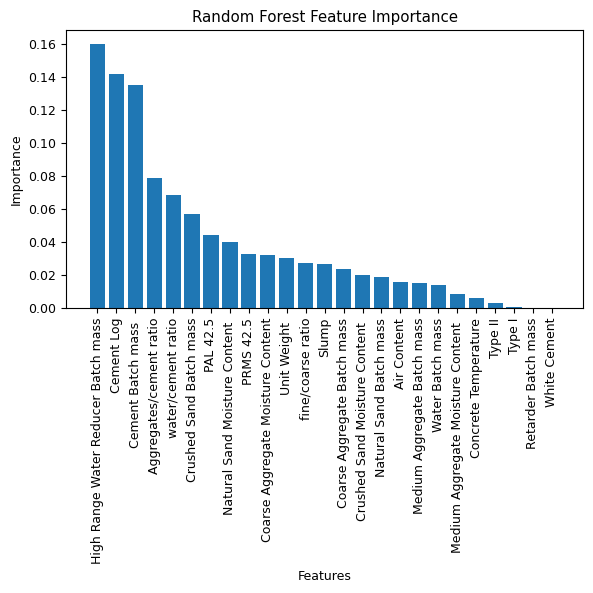

Finish 3º Model - Random Forest...





In [30]:
print("Start 3º Model - Random Forest...")
model_utils.train_and_evaluate_model_Random_Forest(imputed_df, config_file)
print("Finish 3º Model - Random Forest...\n\n\n")   

Start 4º Model - XGBoost...
[14:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-rmse:42.24576
[1]	validation_0-rmse:40.18436
[2]	validation_0-rmse:38.22879
[3]	validation_0-rmse:36.37307
[4]	validation_0-rmse:34.60173
[5]	validation_0-rmse:32.92087
[6]	validation_0-rmse:31.33600
[7]	validation_0-rmse:29.83688
[8]	validation_0-rmse:28.41432
[9]	validation_0-rmse:27.07424
[10]	validation_0-rmse:25.79411
[11]	validation_0-rmse:24.57949
[12]	validation_0-rmse:23.43508
[13]	validation_0-rmse:22.32796
[14]	validation_0-rmse:21.28290
[15]	validation_0-rmse:20.29717
[16]	validation_0-rmse:19.36347
[17]	validation_0-rmse:18.47221
[18]	validation_0-rmse:17.62948
[19]	validation_0-rmse:16.83344
[20]	validation_0-rmse:16.08453
[21]	validation_0-rmse:15.39104
[22]	validation_0-rmse:14.73008
[23]	validation_0-rmse:14.09253
[24]	validation_0

[118]	validation_0-rmse:4.40906
[119]	validation_0-rmse:4.40272
[120]	validation_0-rmse:4.39670
[121]	validation_0-rmse:4.39641
[122]	validation_0-rmse:4.39089
[123]	validation_0-rmse:4.38724
[124]	validation_0-rmse:4.38434
[125]	validation_0-rmse:4.38185
[126]	validation_0-rmse:4.38363
[127]	validation_0-rmse:4.38453
[128]	validation_0-rmse:4.38765
[129]	validation_0-rmse:4.38741
[130]	validation_0-rmse:4.38611
[14:51:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-rmse:42.94143
[1]	validation_0-rmse:40.82395
[2]	validation_0-rmse:38.81389
[3]	validation_0-rmse:36.90629
[4]	validation_0-rmse:35.09402
[5]	validation_0-rmse:33.37484
[6]	validation_0-rmse:31.74579
[7]	validation_0-rmse:30.20118
[8]	validation_0-rmse:28.72694
[9]	validation_0-rmse:27.33246
[10]	validation_0-rmse:26.01214
[11]	validation_0-rmse:24.75735
[12]	validati

[68]	validation_0-rmse:4.76909
[69]	validation_0-rmse:4.73776
[70]	validation_0-rmse:4.71354
[71]	validation_0-rmse:4.69164
[72]	validation_0-rmse:4.66767
[73]	validation_0-rmse:4.64530
[74]	validation_0-rmse:4.62791
[75]	validation_0-rmse:4.60696
[76]	validation_0-rmse:4.59503
[77]	validation_0-rmse:4.58879
[78]	validation_0-rmse:4.57370
[79]	validation_0-rmse:4.55689
[80]	validation_0-rmse:4.54847
[81]	validation_0-rmse:4.53742
[82]	validation_0-rmse:4.53452
[83]	validation_0-rmse:4.52994
[84]	validation_0-rmse:4.52058
[85]	validation_0-rmse:4.51490
[86]	validation_0-rmse:4.51244
[87]	validation_0-rmse:4.51291
[88]	validation_0-rmse:4.51141
[89]	validation_0-rmse:4.50483
[90]	validation_0-rmse:4.49793
[91]	validation_0-rmse:4.49583
[92]	validation_0-rmse:4.48889
[93]	validation_0-rmse:4.48497
[94]	validation_0-rmse:4.48118
[95]	validation_0-rmse:4.47806
[96]	validation_0-rmse:4.47939
[97]	validation_0-rmse:4.47900
[98]	validation_0-rmse:4.47831
[99]	validation_0-rmse:4.48540
[100]	va

[114]	validation_0-rmse:4.65892
[115]	validation_0-rmse:4.66193
[116]	validation_0-rmse:4.66381
[117]	validation_0-rmse:4.66572
[118]	validation_0-rmse:4.66620
+--------------------------------+--------------+
| Metric                         |   Mean Score |
+================================+==============+
| Mean Absolute Error (MAE)      |     3.45223  |
+--------------------------------+--------------+
| Mean Squared Error (MSE)       |    20.2744   |
+--------------------------------+--------------+
| Root Mean Squared Error (RMSE) |     4.50039  |
+--------------------------------+--------------+
| Mean R-squared Score (R2)      |     0.667304 |
+--------------------------------+--------------+
| Mean Training Score            |     0.961997 |
+--------------------------------+--------------+
| Mean Testing Score             |     0.667304 |
+--------------------------------+--------------+
[14:51:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0f

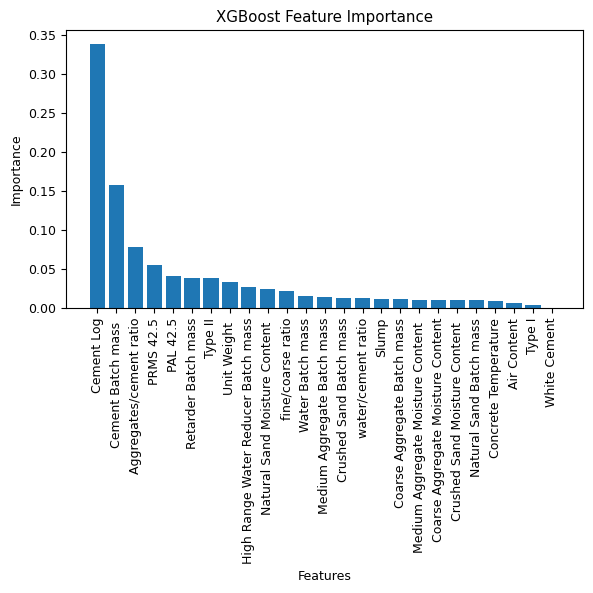

Finish 4º Model - XGBoost...





In [31]:
print("Start 4º Model - XGBoost...")
model_utils.train_and_evaluate_model_XGBoost(imputed_df, config_file)
print("Finish 4º Model - XGBoost...\n\n\n")   

Start 5º Model - LightGBM...
+--------------------------------+--------------+
| Metric                         |   Mean Score |
+================================+==============+
| Mean Absolute Error (MAE)      |     3.45012  |
+--------------------------------+--------------+
| Mean Squared Error (MSE)       |    20.176    |
+--------------------------------+--------------+
| Root Mean Squared Error (RMSE) |     4.48931  |
+--------------------------------+--------------+
| Mean R-squared Score (R2)      |     0.668684 |
+--------------------------------+--------------+
| Mean Training Score            |     0.838192 |
+--------------------------------+--------------+
| Mean Testing Score             |     0.668684 |
+--------------------------------+--------------+


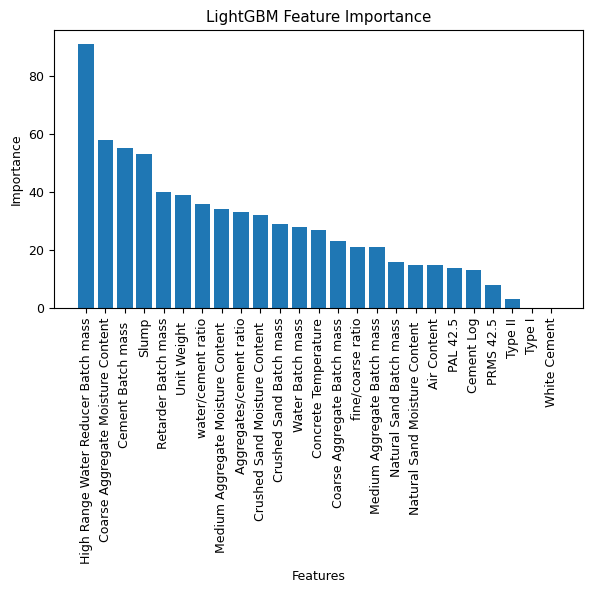

Finish 5º Model - LightGBM...





In [32]:
print("Start 5º Model - LightGBM...")
model_utils.train_and_evaluate_model_LightGBM(imputed_df, config_file)
print("Finish 5º Model - LightGBM...\n\n\n")  

Start 6º Model - CatBoost...
0:	learn: 7.4417886	total: 160ms	remaining: 2m 40s
1:	learn: 7.0735978	total: 171ms	remaining: 1m 25s
2:	learn: 6.7306686	total: 179ms	remaining: 59.6s
3:	learn: 6.4642692	total: 187ms	remaining: 46.4s
4:	learn: 6.2447214	total: 193ms	remaining: 38.4s
5:	learn: 6.0386943	total: 200ms	remaining: 33.1s
6:	learn: 5.8558843	total: 206ms	remaining: 29.3s
7:	learn: 5.7032251	total: 213ms	remaining: 26.5s
8:	learn: 5.5370059	total: 220ms	remaining: 24.3s
9:	learn: 5.3963108	total: 227ms	remaining: 22.5s
10:	learn: 5.2875947	total: 233ms	remaining: 21s
11:	learn: 5.1650404	total: 241ms	remaining: 19.8s
12:	learn: 5.0513569	total: 247ms	remaining: 18.8s
13:	learn: 4.9433123	total: 264ms	remaining: 18.6s
14:	learn: 4.8364184	total: 288ms	remaining: 18.9s
15:	learn: 4.7684987	total: 313ms	remaining: 19.2s
16:	learn: 4.7005886	total: 334ms	remaining: 19.3s
17:	learn: 4.6262388	total: 352ms	remaining: 19.2s
18:	learn: 4.5541996	total: 363ms	remaining: 18.7s
19:	learn: 4

160:	learn: 1.9758086	total: 2.19s	remaining: 11.4s
161:	learn: 1.9607343	total: 2.2s	remaining: 11.4s
162:	learn: 1.9481204	total: 2.22s	remaining: 11.4s
163:	learn: 1.9463216	total: 2.23s	remaining: 11.3s
164:	learn: 1.9447515	total: 2.23s	remaining: 11.3s
165:	learn: 1.9361761	total: 2.24s	remaining: 11.3s
166:	learn: 1.9201470	total: 2.25s	remaining: 11.2s
167:	learn: 1.9066150	total: 2.27s	remaining: 11.2s
168:	learn: 1.8919398	total: 2.28s	remaining: 11.2s
169:	learn: 1.8849600	total: 2.29s	remaining: 11.2s
170:	learn: 1.8790028	total: 2.29s	remaining: 11.1s
171:	learn: 1.8655274	total: 2.3s	remaining: 11.1s
172:	learn: 1.8642771	total: 2.31s	remaining: 11s
173:	learn: 1.8576750	total: 2.32s	remaining: 11s
174:	learn: 1.8514889	total: 2.33s	remaining: 11s
175:	learn: 1.8435694	total: 2.34s	remaining: 11s
176:	learn: 1.8271183	total: 2.35s	remaining: 10.9s
177:	learn: 1.8135604	total: 2.36s	remaining: 10.9s
178:	learn: 1.8054556	total: 2.37s	remaining: 10.9s
179:	learn: 1.7984899	

320:	learn: 1.0798082	total: 4.02s	remaining: 8.51s
321:	learn: 1.0736984	total: 4.03s	remaining: 8.49s
322:	learn: 1.0717374	total: 4.04s	remaining: 8.47s
323:	learn: 1.0677037	total: 4.05s	remaining: 8.45s
324:	learn: 1.0668921	total: 4.06s	remaining: 8.43s
325:	learn: 1.0654951	total: 4.07s	remaining: 8.4s
326:	learn: 1.0593995	total: 4.07s	remaining: 8.38s
327:	learn: 1.0568462	total: 4.08s	remaining: 8.35s
328:	learn: 1.0559983	total: 4.08s	remaining: 8.33s
329:	learn: 1.0502050	total: 4.09s	remaining: 8.31s
330:	learn: 1.0459720	total: 4.11s	remaining: 8.3s
331:	learn: 1.0451045	total: 4.12s	remaining: 8.28s
332:	learn: 1.0401493	total: 4.12s	remaining: 8.26s
333:	learn: 1.0338169	total: 4.13s	remaining: 8.24s
334:	learn: 1.0331589	total: 4.14s	remaining: 8.22s
335:	learn: 1.0326463	total: 4.15s	remaining: 8.19s
336:	learn: 1.0281941	total: 4.15s	remaining: 8.17s
337:	learn: 1.0245892	total: 4.16s	remaining: 8.14s
338:	learn: 1.0174718	total: 4.16s	remaining: 8.12s
339:	learn: 1.

483:	learn: 0.6289169	total: 6.5s	remaining: 6.93s
484:	learn: 0.6285200	total: 6.53s	remaining: 6.94s
485:	learn: 0.6283596	total: 6.55s	remaining: 6.93s
486:	learn: 0.6251940	total: 6.57s	remaining: 6.92s
487:	learn: 0.6219596	total: 6.61s	remaining: 6.93s
488:	learn: 0.6207970	total: 6.64s	remaining: 6.94s
489:	learn: 0.6175068	total: 6.69s	remaining: 6.96s
490:	learn: 0.6158760	total: 6.72s	remaining: 6.96s
491:	learn: 0.6123961	total: 6.74s	remaining: 6.96s
492:	learn: 0.6119784	total: 6.76s	remaining: 6.95s
493:	learn: 0.6107386	total: 6.77s	remaining: 6.93s
494:	learn: 0.6103947	total: 6.78s	remaining: 6.92s
495:	learn: 0.6101810	total: 6.8s	remaining: 6.91s
496:	learn: 0.6094180	total: 6.82s	remaining: 6.91s
497:	learn: 0.6065808	total: 6.85s	remaining: 6.9s
498:	learn: 0.6047948	total: 6.88s	remaining: 6.91s
499:	learn: 0.6043994	total: 6.9s	remaining: 6.9s
500:	learn: 0.6043093	total: 6.91s	remaining: 6.88s
501:	learn: 0.6019546	total: 6.92s	remaining: 6.86s
502:	learn: 0.599

651:	learn: 0.4138157	total: 9.22s	remaining: 4.92s
652:	learn: 0.4121392	total: 9.25s	remaining: 4.91s
653:	learn: 0.4103566	total: 9.27s	remaining: 4.9s
654:	learn: 0.4103204	total: 9.29s	remaining: 4.89s
655:	learn: 0.4091200	total: 9.3s	remaining: 4.88s
656:	learn: 0.4086971	total: 9.31s	remaining: 4.86s
657:	learn: 0.4067934	total: 9.32s	remaining: 4.84s
658:	learn: 0.4067670	total: 9.33s	remaining: 4.83s
659:	learn: 0.4063360	total: 9.34s	remaining: 4.81s
660:	learn: 0.4048111	total: 9.34s	remaining: 4.79s
661:	learn: 0.4029254	total: 9.36s	remaining: 4.78s
662:	learn: 0.4012690	total: 9.37s	remaining: 4.76s
663:	learn: 0.4003518	total: 9.38s	remaining: 4.75s
664:	learn: 0.3994227	total: 9.38s	remaining: 4.73s
665:	learn: 0.3990673	total: 9.39s	remaining: 4.71s
666:	learn: 0.3986398	total: 9.4s	remaining: 4.7s
667:	learn: 0.3979797	total: 9.42s	remaining: 4.68s
668:	learn: 0.3975646	total: 9.43s	remaining: 4.67s
669:	learn: 0.3955255	total: 9.44s	remaining: 4.65s
670:	learn: 0.39

824:	learn: 0.2670279	total: 11.5s	remaining: 2.44s
825:	learn: 0.2660142	total: 11.5s	remaining: 2.42s
826:	learn: 0.2659666	total: 11.5s	remaining: 2.41s
827:	learn: 0.2652961	total: 11.5s	remaining: 2.39s
828:	learn: 0.2644975	total: 11.5s	remaining: 2.38s
829:	learn: 0.2640546	total: 11.5s	remaining: 2.36s
830:	learn: 0.2633763	total: 11.5s	remaining: 2.35s
831:	learn: 0.2626441	total: 11.6s	remaining: 2.33s
832:	learn: 0.2616305	total: 11.6s	remaining: 2.32s
833:	learn: 0.2608495	total: 11.6s	remaining: 2.31s
834:	learn: 0.2607489	total: 11.6s	remaining: 2.29s
835:	learn: 0.2607319	total: 11.6s	remaining: 2.27s
836:	learn: 0.2600513	total: 11.6s	remaining: 2.26s
837:	learn: 0.2587045	total: 11.6s	remaining: 2.25s
838:	learn: 0.2581501	total: 11.6s	remaining: 2.23s
839:	learn: 0.2576372	total: 11.6s	remaining: 2.22s
840:	learn: 0.2573182	total: 11.7s	remaining: 2.2s
841:	learn: 0.2564632	total: 11.7s	remaining: 2.19s
842:	learn: 0.2550725	total: 11.7s	remaining: 2.17s
843:	learn: 0

995:	learn: 0.1723482	total: 13.8s	remaining: 55.3ms
996:	learn: 0.1720430	total: 13.8s	remaining: 41.5ms
997:	learn: 0.1715301	total: 13.8s	remaining: 27.7ms
998:	learn: 0.1707941	total: 13.8s	remaining: 13.8ms
999:	learn: 0.1705331	total: 13.8s	remaining: 0us
0:	learn: 7.3698143	total: 16.1ms	remaining: 16.1s
1:	learn: 7.0315106	total: 29.4ms	remaining: 14.7s
2:	learn: 6.7181553	total: 42.6ms	remaining: 14.2s
3:	learn: 6.4554826	total: 56.6ms	remaining: 14.1s
4:	learn: 6.2644504	total: 71.5ms	remaining: 14.2s
5:	learn: 6.0740973	total: 85.9ms	remaining: 14.2s
6:	learn: 5.8721455	total: 99.7ms	remaining: 14.1s
7:	learn: 5.6979570	total: 112ms	remaining: 13.9s
8:	learn: 5.5572985	total: 121ms	remaining: 13.4s
9:	learn: 5.4197499	total: 128ms	remaining: 12.7s
10:	learn: 5.2929188	total: 134ms	remaining: 12.1s
11:	learn: 5.1808331	total: 143ms	remaining: 11.8s
12:	learn: 5.0604751	total: 160ms	remaining: 12.2s
13:	learn: 4.9438705	total: 178ms	remaining: 12.5s
14:	learn: 4.8489485	total:

156:	learn: 1.9870953	total: 1.87s	remaining: 10s
157:	learn: 1.9738041	total: 1.89s	remaining: 10.1s
158:	learn: 1.9621658	total: 1.9s	remaining: 10.1s
159:	learn: 1.9483867	total: 1.91s	remaining: 10s
160:	learn: 1.9356421	total: 1.92s	remaining: 10s
161:	learn: 1.9291140	total: 1.93s	remaining: 9.97s
162:	learn: 1.9162232	total: 1.93s	remaining: 9.93s
163:	learn: 1.9149885	total: 1.94s	remaining: 9.9s
164:	learn: 1.8988437	total: 1.96s	remaining: 9.91s
165:	learn: 1.8974154	total: 1.97s	remaining: 9.89s
166:	learn: 1.8858411	total: 1.98s	remaining: 9.86s
167:	learn: 1.8711933	total: 1.98s	remaining: 9.83s
168:	learn: 1.8653896	total: 1.99s	remaining: 9.78s
169:	learn: 1.8537672	total: 2s	remaining: 9.74s
170:	learn: 1.8435901	total: 2s	remaining: 9.71s
171:	learn: 1.8375961	total: 2.02s	remaining: 9.71s
172:	learn: 1.8225845	total: 2.03s	remaining: 9.7s
173:	learn: 1.8183572	total: 2.04s	remaining: 9.68s
174:	learn: 1.8027795	total: 2.04s	remaining: 9.64s
175:	learn: 1.7907807	total

320:	learn: 0.9613790	total: 3.46s	remaining: 7.32s
321:	learn: 0.9608621	total: 3.48s	remaining: 7.32s
322:	learn: 0.9523439	total: 3.5s	remaining: 7.33s
323:	learn: 0.9464817	total: 3.51s	remaining: 7.33s
324:	learn: 0.9462268	total: 3.52s	remaining: 7.32s
325:	learn: 0.9432430	total: 3.54s	remaining: 7.31s
326:	learn: 0.9388612	total: 3.54s	remaining: 7.29s
327:	learn: 0.9347521	total: 3.56s	remaining: 7.29s
328:	learn: 0.9344268	total: 3.57s	remaining: 7.28s
329:	learn: 0.9270957	total: 3.58s	remaining: 7.28s
330:	learn: 0.9260439	total: 3.59s	remaining: 7.26s
331:	learn: 0.9209411	total: 3.6s	remaining: 7.24s
332:	learn: 0.9184184	total: 3.6s	remaining: 7.22s
333:	learn: 0.9145884	total: 3.61s	remaining: 7.2s
334:	learn: 0.9115548	total: 3.62s	remaining: 7.18s
335:	learn: 0.9066038	total: 3.63s	remaining: 7.17s
336:	learn: 0.9016010	total: 3.66s	remaining: 7.19s
337:	learn: 0.8952469	total: 3.68s	remaining: 7.2s
338:	learn: 0.8937831	total: 3.69s	remaining: 7.2s
339:	learn: 0.8912

495:	learn: 0.4930634	total: 5.28s	remaining: 5.36s
496:	learn: 0.4912964	total: 5.28s	remaining: 5.35s
497:	learn: 0.4884816	total: 5.29s	remaining: 5.33s
498:	learn: 0.4856922	total: 5.3s	remaining: 5.32s
499:	learn: 0.4823247	total: 5.31s	remaining: 5.31s
500:	learn: 0.4820520	total: 5.31s	remaining: 5.29s
501:	learn: 0.4790689	total: 5.32s	remaining: 5.28s
502:	learn: 0.4788139	total: 5.33s	remaining: 5.26s
503:	learn: 0.4772011	total: 5.33s	remaining: 5.25s
504:	learn: 0.4752103	total: 5.34s	remaining: 5.24s
505:	learn: 0.4720513	total: 5.35s	remaining: 5.22s
506:	learn: 0.4699730	total: 5.36s	remaining: 5.21s
507:	learn: 0.4684880	total: 5.37s	remaining: 5.2s
508:	learn: 0.4656562	total: 5.37s	remaining: 5.18s
509:	learn: 0.4655701	total: 5.38s	remaining: 5.17s
510:	learn: 0.4647886	total: 5.39s	remaining: 5.15s
511:	learn: 0.4621308	total: 5.39s	remaining: 5.14s
512:	learn: 0.4589464	total: 5.4s	remaining: 5.13s
513:	learn: 0.4588479	total: 5.41s	remaining: 5.11s
514:	learn: 0.4

659:	learn: 0.2861956	total: 6.67s	remaining: 3.44s
660:	learn: 0.2852098	total: 6.7s	remaining: 3.43s
661:	learn: 0.2851664	total: 6.72s	remaining: 3.43s
662:	learn: 0.2841165	total: 6.74s	remaining: 3.42s
663:	learn: 0.2830062	total: 6.76s	remaining: 3.42s
664:	learn: 0.2820370	total: 6.78s	remaining: 3.41s
665:	learn: 0.2813339	total: 6.79s	remaining: 3.4s
666:	learn: 0.2812070	total: 6.79s	remaining: 3.39s
667:	learn: 0.2807847	total: 6.8s	remaining: 3.38s
668:	learn: 0.2802126	total: 6.81s	remaining: 3.37s
669:	learn: 0.2787735	total: 6.81s	remaining: 3.35s
670:	learn: 0.2776320	total: 6.82s	remaining: 3.34s
671:	learn: 0.2763617	total: 6.84s	remaining: 3.34s
672:	learn: 0.2762942	total: 6.85s	remaining: 3.33s
673:	learn: 0.2749472	total: 6.86s	remaining: 3.31s
674:	learn: 0.2748447	total: 6.86s	remaining: 3.3s
675:	learn: 0.2746977	total: 6.87s	remaining: 3.29s
676:	learn: 0.2743601	total: 6.89s	remaining: 3.29s
677:	learn: 0.2726030	total: 6.91s	remaining: 3.28s
678:	learn: 0.27

818:	learn: 0.1788060	total: 8.32s	remaining: 1.84s
819:	learn: 0.1785652	total: 8.34s	remaining: 1.83s
820:	learn: 0.1780156	total: 8.36s	remaining: 1.82s
821:	learn: 0.1771904	total: 8.38s	remaining: 1.81s
822:	learn: 0.1764022	total: 8.4s	remaining: 1.81s
823:	learn: 0.1755142	total: 8.41s	remaining: 1.8s
824:	learn: 0.1749134	total: 8.42s	remaining: 1.79s
825:	learn: 0.1744680	total: 8.43s	remaining: 1.77s
826:	learn: 0.1740519	total: 8.44s	remaining: 1.76s
827:	learn: 0.1727986	total: 8.44s	remaining: 1.75s
828:	learn: 0.1724130	total: 8.45s	remaining: 1.74s
829:	learn: 0.1719183	total: 8.45s	remaining: 1.73s
830:	learn: 0.1712533	total: 8.46s	remaining: 1.72s
831:	learn: 0.1710283	total: 8.46s	remaining: 1.71s
832:	learn: 0.1706814	total: 8.47s	remaining: 1.7s
833:	learn: 0.1703979	total: 8.48s	remaining: 1.69s
834:	learn: 0.1701094	total: 8.48s	remaining: 1.68s
835:	learn: 0.1697086	total: 8.49s	remaining: 1.66s
836:	learn: 0.1696874	total: 8.49s	remaining: 1.65s
837:	learn: 0.1

980:	learn: 0.1191545	total: 9.94s	remaining: 192ms
981:	learn: 0.1191441	total: 9.95s	remaining: 182ms
982:	learn: 0.1187763	total: 9.95s	remaining: 172ms
983:	learn: 0.1183162	total: 9.96s	remaining: 162ms
984:	learn: 0.1182094	total: 9.97s	remaining: 152ms
985:	learn: 0.1180067	total: 9.98s	remaining: 142ms
986:	learn: 0.1177462	total: 9.99s	remaining: 132ms
987:	learn: 0.1173963	total: 10s	remaining: 121ms
988:	learn: 0.1168353	total: 10s	remaining: 111ms
989:	learn: 0.1164948	total: 10s	remaining: 101ms
990:	learn: 0.1160060	total: 10s	remaining: 91ms
991:	learn: 0.1153297	total: 10s	remaining: 80.9ms
992:	learn: 0.1150213	total: 10s	remaining: 70.7ms
993:	learn: 0.1149635	total: 10s	remaining: 60.6ms
994:	learn: 0.1149478	total: 10s	remaining: 50.5ms
995:	learn: 0.1143594	total: 10s	remaining: 40.4ms
996:	learn: 0.1142206	total: 10.1s	remaining: 30.3ms
997:	learn: 0.1139239	total: 10.1s	remaining: 20.2ms
998:	learn: 0.1138590	total: 10.1s	remaining: 10.1ms
999:	learn: 0.1132623	t

156:	learn: 1.8580427	total: 1.45s	remaining: 7.81s
157:	learn: 1.8414968	total: 1.47s	remaining: 7.83s
158:	learn: 1.8384597	total: 1.49s	remaining: 7.87s
159:	learn: 1.8213473	total: 1.51s	remaining: 7.92s
160:	learn: 1.8161043	total: 1.53s	remaining: 7.96s
161:	learn: 1.8104743	total: 1.54s	remaining: 8s
162:	learn: 1.8092112	total: 1.56s	remaining: 8.02s
163:	learn: 1.7991651	total: 1.57s	remaining: 8.02s
164:	learn: 1.7980425	total: 1.59s	remaining: 8.04s
165:	learn: 1.7855985	total: 1.6s	remaining: 8.04s
166:	learn: 1.7740947	total: 1.62s	remaining: 8.07s
167:	learn: 1.7610918	total: 1.63s	remaining: 8.05s
168:	learn: 1.7512639	total: 1.63s	remaining: 8.03s
169:	learn: 1.7446596	total: 1.64s	remaining: 8.02s
170:	learn: 1.7391201	total: 1.66s	remaining: 8.03s
171:	learn: 1.7253804	total: 1.67s	remaining: 8.02s
172:	learn: 1.7234832	total: 1.67s	remaining: 7.99s
173:	learn: 1.7085379	total: 1.68s	remaining: 7.97s
174:	learn: 1.7001147	total: 1.68s	remaining: 7.94s
175:	learn: 1.68

319:	learn: 0.9577341	total: 3.26s	remaining: 6.93s
320:	learn: 0.9542709	total: 3.28s	remaining: 6.94s
321:	learn: 0.9516268	total: 3.3s	remaining: 6.96s
322:	learn: 0.9475359	total: 3.32s	remaining: 6.96s
323:	learn: 0.9461943	total: 3.34s	remaining: 6.98s
324:	learn: 0.9385149	total: 3.37s	remaining: 7s
325:	learn: 0.9350382	total: 3.38s	remaining: 6.99s
326:	learn: 0.9304234	total: 3.39s	remaining: 6.97s
327:	learn: 0.9274179	total: 3.4s	remaining: 6.96s
328:	learn: 0.9243218	total: 3.4s	remaining: 6.94s
329:	learn: 0.9240596	total: 3.41s	remaining: 6.92s
330:	learn: 0.9206757	total: 3.41s	remaining: 6.9s
331:	learn: 0.9132567	total: 3.42s	remaining: 6.88s
332:	learn: 0.9130096	total: 3.42s	remaining: 6.86s
333:	learn: 0.9111582	total: 3.43s	remaining: 6.84s
334:	learn: 0.9057791	total: 3.43s	remaining: 6.82s
335:	learn: 0.9049304	total: 3.44s	remaining: 6.8s
336:	learn: 0.9008546	total: 3.45s	remaining: 6.78s
337:	learn: 0.8988562	total: 3.45s	remaining: 6.76s
338:	learn: 0.895629

485:	learn: 0.5443118	total: 4.91s	remaining: 5.19s
486:	learn: 0.5442606	total: 4.92s	remaining: 5.18s
487:	learn: 0.5410891	total: 4.92s	remaining: 5.17s
488:	learn: 0.5395473	total: 4.93s	remaining: 5.15s
489:	learn: 0.5370344	total: 4.93s	remaining: 5.14s
490:	learn: 0.5355462	total: 4.94s	remaining: 5.12s
491:	learn: 0.5327195	total: 4.95s	remaining: 5.11s
492:	learn: 0.5296336	total: 4.95s	remaining: 5.09s
493:	learn: 0.5294021	total: 4.96s	remaining: 5.08s
494:	learn: 0.5277520	total: 4.96s	remaining: 5.06s
495:	learn: 0.5251025	total: 4.97s	remaining: 5.05s
496:	learn: 0.5222954	total: 4.97s	remaining: 5.03s
497:	learn: 0.5192170	total: 4.98s	remaining: 5.02s
498:	learn: 0.5163361	total: 4.98s	remaining: 5s
499:	learn: 0.5131239	total: 4.99s	remaining: 4.99s
500:	learn: 0.5116046	total: 5s	remaining: 4.98s
501:	learn: 0.5101230	total: 5.02s	remaining: 4.98s
502:	learn: 0.5079937	total: 5.03s	remaining: 4.97s
503:	learn: 0.5067199	total: 5.05s	remaining: 4.97s
504:	learn: 0.5059

659:	learn: 0.3136301	total: 6.53s	remaining: 3.37s
660:	learn: 0.3113466	total: 6.54s	remaining: 3.35s
661:	learn: 0.3111708	total: 6.55s	remaining: 3.34s
662:	learn: 0.3102772	total: 6.55s	remaining: 3.33s
663:	learn: 0.3094417	total: 6.56s	remaining: 3.32s
664:	learn: 0.3083643	total: 6.56s	remaining: 3.31s
665:	learn: 0.3072329	total: 6.57s	remaining: 3.29s
666:	learn: 0.3067818	total: 6.58s	remaining: 3.28s
667:	learn: 0.3055777	total: 6.58s	remaining: 3.27s
668:	learn: 0.3047573	total: 6.59s	remaining: 3.26s
669:	learn: 0.3043731	total: 6.59s	remaining: 3.25s
670:	learn: 0.3036680	total: 6.6s	remaining: 3.24s
671:	learn: 0.3017945	total: 6.61s	remaining: 3.23s
672:	learn: 0.3009630	total: 6.61s	remaining: 3.21s
673:	learn: 0.3004566	total: 6.63s	remaining: 3.2s
674:	learn: 0.3003687	total: 6.64s	remaining: 3.2s
675:	learn: 0.2996671	total: 6.66s	remaining: 3.19s
676:	learn: 0.2995176	total: 6.67s	remaining: 3.18s
677:	learn: 0.2983565	total: 6.69s	remaining: 3.18s
678:	learn: 0.2

833:	learn: 0.1874103	total: 8.16s	remaining: 1.62s
834:	learn: 0.1873973	total: 8.17s	remaining: 1.61s
835:	learn: 0.1863101	total: 8.18s	remaining: 1.6s
836:	learn: 0.1862043	total: 8.19s	remaining: 1.59s
837:	learn: 0.1851369	total: 8.21s	remaining: 1.59s
838:	learn: 0.1843791	total: 8.22s	remaining: 1.58s
839:	learn: 0.1843238	total: 8.22s	remaining: 1.57s
840:	learn: 0.1832958	total: 8.23s	remaining: 1.56s
841:	learn: 0.1830050	total: 8.24s	remaining: 1.55s
842:	learn: 0.1829545	total: 8.25s	remaining: 1.53s
843:	learn: 0.1819719	total: 8.25s	remaining: 1.52s
844:	learn: 0.1815149	total: 8.26s	remaining: 1.51s
845:	learn: 0.1801824	total: 8.27s	remaining: 1.5s
846:	learn: 0.1799152	total: 8.28s	remaining: 1.5s
847:	learn: 0.1792575	total: 8.28s	remaining: 1.48s
848:	learn: 0.1785649	total: 8.29s	remaining: 1.47s
849:	learn: 0.1780962	total: 8.3s	remaining: 1.46s
850:	learn: 0.1780828	total: 8.31s	remaining: 1.45s
851:	learn: 0.1775710	total: 8.31s	remaining: 1.44s
852:	learn: 0.17

992:	learn: 0.1214632	total: 9.77s	remaining: 68.9ms
993:	learn: 0.1210337	total: 9.78s	remaining: 59.1ms
994:	learn: 0.1205790	total: 9.79s	remaining: 49.2ms
995:	learn: 0.1198117	total: 9.8s	remaining: 39.4ms
996:	learn: 0.1193470	total: 9.8s	remaining: 29.5ms
997:	learn: 0.1192241	total: 9.81s	remaining: 19.7ms
998:	learn: 0.1192150	total: 9.82s	remaining: 9.83ms
999:	learn: 0.1191998	total: 9.83s	remaining: 0us
0:	learn: 7.4396611	total: 15.9ms	remaining: 15.8s
1:	learn: 7.1117091	total: 28.3ms	remaining: 14.1s
2:	learn: 6.8075484	total: 37.4ms	remaining: 12.4s
3:	learn: 6.5197105	total: 45.9ms	remaining: 11.4s
4:	learn: 6.2980693	total: 55.4ms	remaining: 11s
5:	learn: 6.0780115	total: 64.6ms	remaining: 10.7s
6:	learn: 5.8843751	total: 73.8ms	remaining: 10.5s
7:	learn: 5.6999273	total: 81.6ms	remaining: 10.1s
8:	learn: 5.5290112	total: 89.4ms	remaining: 9.84s
9:	learn: 5.3888168	total: 97.7ms	remaining: 9.68s
10:	learn: 5.2750092	total: 107ms	remaining: 9.58s
11:	learn: 5.1465151	t

156:	learn: 1.8305049	total: 1.45s	remaining: 7.77s
157:	learn: 1.8217642	total: 1.46s	remaining: 7.8s
158:	learn: 1.8097885	total: 1.48s	remaining: 7.85s
159:	learn: 1.7914577	total: 1.5s	remaining: 7.9s
160:	learn: 1.7860430	total: 1.52s	remaining: 7.94s
161:	learn: 1.7767173	total: 1.54s	remaining: 7.97s
162:	learn: 1.7685799	total: 1.55s	remaining: 7.98s
163:	learn: 1.7602608	total: 1.56s	remaining: 7.98s
164:	learn: 1.7486395	total: 1.57s	remaining: 7.96s
165:	learn: 1.7404176	total: 1.58s	remaining: 7.95s
166:	learn: 1.7325291	total: 1.59s	remaining: 7.92s
167:	learn: 1.7247373	total: 1.59s	remaining: 7.9s
168:	learn: 1.7062195	total: 1.6s	remaining: 7.88s
169:	learn: 1.7001043	total: 1.61s	remaining: 7.86s
170:	learn: 1.6959108	total: 1.62s	remaining: 7.84s
171:	learn: 1.6840290	total: 1.62s	remaining: 7.82s
172:	learn: 1.6737663	total: 1.63s	remaining: 7.8s
173:	learn: 1.6586005	total: 1.65s	remaining: 7.81s
174:	learn: 1.6482789	total: 1.67s	remaining: 7.87s
175:	learn: 1.6424

326:	learn: 0.8267702	total: 3.3s	remaining: 6.79s
327:	learn: 0.8241271	total: 3.32s	remaining: 6.81s
328:	learn: 0.8203711	total: 3.34s	remaining: 6.82s
329:	learn: 0.8161899	total: 3.36s	remaining: 6.83s
330:	learn: 0.8147496	total: 3.37s	remaining: 6.82s
331:	learn: 0.8115367	total: 3.38s	remaining: 6.8s
332:	learn: 0.8054970	total: 3.39s	remaining: 6.78s
333:	learn: 0.8025838	total: 3.39s	remaining: 6.76s
334:	learn: 0.7987387	total: 3.4s	remaining: 6.74s
335:	learn: 0.7969654	total: 3.4s	remaining: 6.72s
336:	learn: 0.7949035	total: 3.41s	remaining: 6.71s
337:	learn: 0.7930848	total: 3.42s	remaining: 6.71s
338:	learn: 0.7880737	total: 3.43s	remaining: 6.69s
339:	learn: 0.7865179	total: 3.44s	remaining: 6.68s
340:	learn: 0.7803979	total: 3.45s	remaining: 6.66s
341:	learn: 0.7781266	total: 3.45s	remaining: 6.64s
342:	learn: 0.7763477	total: 3.46s	remaining: 6.63s
343:	learn: 0.7699343	total: 3.48s	remaining: 6.63s
344:	learn: 0.7696507	total: 3.5s	remaining: 6.64s
345:	learn: 0.766

494:	learn: 0.4360352	total: 4.96s	remaining: 5.07s
495:	learn: 0.4342598	total: 4.98s	remaining: 5.06s
496:	learn: 0.4327380	total: 5s	remaining: 5.06s
497:	learn: 0.4320837	total: 5.01s	remaining: 5.05s
498:	learn: 0.4317763	total: 5.02s	remaining: 5.04s
499:	learn: 0.4316587	total: 5.03s	remaining: 5.03s
500:	learn: 0.4303052	total: 5.03s	remaining: 5.01s
501:	learn: 0.4290405	total: 5.04s	remaining: 5s
502:	learn: 0.4267463	total: 5.04s	remaining: 4.98s
503:	learn: 0.4265794	total: 5.05s	remaining: 4.97s
504:	learn: 0.4256977	total: 5.06s	remaining: 4.96s
505:	learn: 0.4239306	total: 5.07s	remaining: 4.95s
506:	learn: 0.4225883	total: 5.08s	remaining: 4.94s
507:	learn: 0.4200115	total: 5.09s	remaining: 4.93s
508:	learn: 0.4180670	total: 5.09s	remaining: 4.91s
509:	learn: 0.4161470	total: 5.1s	remaining: 4.9s
510:	learn: 0.4152114	total: 5.11s	remaining: 4.89s
511:	learn: 0.4133185	total: 5.11s	remaining: 4.87s
512:	learn: 0.4118361	total: 5.12s	remaining: 4.86s
513:	learn: 0.410738

670:	learn: 0.2574125	total: 6.8s	remaining: 3.33s
671:	learn: 0.2566520	total: 6.82s	remaining: 3.33s
672:	learn: 0.2557308	total: 6.83s	remaining: 3.32s
673:	learn: 0.2543617	total: 6.84s	remaining: 3.31s
674:	learn: 0.2527315	total: 6.85s	remaining: 3.3s
675:	learn: 0.2514678	total: 6.86s	remaining: 3.29s
676:	learn: 0.2507474	total: 6.86s	remaining: 3.27s
677:	learn: 0.2499767	total: 6.87s	remaining: 3.26s
678:	learn: 0.2493784	total: 6.88s	remaining: 3.25s
679:	learn: 0.2485178	total: 6.88s	remaining: 3.24s
680:	learn: 0.2480047	total: 6.89s	remaining: 3.23s
681:	learn: 0.2469592	total: 6.89s	remaining: 3.21s
682:	learn: 0.2468367	total: 6.9s	remaining: 3.2s
683:	learn: 0.2460834	total: 6.91s	remaining: 3.19s
684:	learn: 0.2459954	total: 6.91s	remaining: 3.18s
685:	learn: 0.2458599	total: 6.93s	remaining: 3.17s
686:	learn: 0.2454900	total: 6.94s	remaining: 3.16s
687:	learn: 0.2442028	total: 6.96s	remaining: 3.16s
688:	learn: 0.2435831	total: 6.98s	remaining: 3.15s
689:	learn: 0.24

849:	learn: 0.1552898	total: 8.62s	remaining: 1.52s
850:	learn: 0.1545554	total: 8.63s	remaining: 1.51s
851:	learn: 0.1535751	total: 8.64s	remaining: 1.5s
852:	learn: 0.1530470	total: 8.66s	remaining: 1.49s
853:	learn: 0.1523527	total: 8.68s	remaining: 1.48s
854:	learn: 0.1516327	total: 8.7s	remaining: 1.48s
855:	learn: 0.1512206	total: 8.72s	remaining: 1.47s
856:	learn: 0.1510775	total: 8.74s	remaining: 1.46s
857:	learn: 0.1507409	total: 8.75s	remaining: 1.45s
858:	learn: 0.1501143	total: 8.76s	remaining: 1.44s
859:	learn: 0.1493682	total: 8.77s	remaining: 1.43s
860:	learn: 0.1489173	total: 8.77s	remaining: 1.42s
861:	learn: 0.1482156	total: 8.78s	remaining: 1.41s
862:	learn: 0.1475730	total: 8.79s	remaining: 1.39s
863:	learn: 0.1475071	total: 8.79s	remaining: 1.38s
864:	learn: 0.1468111	total: 8.8s	remaining: 1.37s
865:	learn: 0.1461345	total: 8.8s	remaining: 1.36s
866:	learn: 0.1459975	total: 8.81s	remaining: 1.35s
867:	learn: 0.1456975	total: 8.82s	remaining: 1.34s
868:	learn: 0.14

19:	learn: 4.5170511	total: 207ms	remaining: 10.1s
20:	learn: 4.4438095	total: 218ms	remaining: 10.1s
21:	learn: 4.3952783	total: 237ms	remaining: 10.5s
22:	learn: 4.3299300	total: 258ms	remaining: 11s
23:	learn: 4.2906494	total: 275ms	remaining: 11.2s
24:	learn: 4.2553906	total: 293ms	remaining: 11.4s
25:	learn: 4.1927846	total: 312ms	remaining: 11.7s
26:	learn: 4.1421220	total: 325ms	remaining: 11.7s
27:	learn: 4.1106357	total: 337ms	remaining: 11.7s
28:	learn: 4.0656170	total: 348ms	remaining: 11.7s
29:	learn: 4.0199211	total: 357ms	remaining: 11.5s
30:	learn: 3.9840233	total: 365ms	remaining: 11.4s
31:	learn: 3.9476520	total: 372ms	remaining: 11.3s
32:	learn: 3.9017602	total: 378ms	remaining: 11.1s
33:	learn: 3.8651843	total: 384ms	remaining: 10.9s
34:	learn: 3.8362862	total: 389ms	remaining: 10.7s
35:	learn: 3.8089778	total: 398ms	remaining: 10.7s
36:	learn: 3.7874444	total: 414ms	remaining: 10.8s
37:	learn: 3.7519132	total: 431ms	remaining: 10.9s
38:	learn: 3.7310684	total: 450ms

185:	learn: 1.7116098	total: 1.86s	remaining: 8.16s
186:	learn: 1.6948886	total: 1.87s	remaining: 8.14s
187:	learn: 1.6903900	total: 1.88s	remaining: 8.13s
188:	learn: 1.6735953	total: 1.89s	remaining: 8.11s
189:	learn: 1.6729629	total: 1.9s	remaining: 8.09s
190:	learn: 1.6677984	total: 1.9s	remaining: 8.07s
191:	learn: 1.6603499	total: 1.91s	remaining: 8.05s
192:	learn: 1.6440999	total: 1.92s	remaining: 8.03s
193:	learn: 1.6346049	total: 1.93s	remaining: 8s
194:	learn: 1.6315980	total: 1.93s	remaining: 7.99s
195:	learn: 1.6277843	total: 1.95s	remaining: 7.99s
196:	learn: 1.6262228	total: 1.97s	remaining: 8.02s
197:	learn: 1.6119207	total: 1.99s	remaining: 8.04s
198:	learn: 1.6108494	total: 2s	remaining: 8.07s
199:	learn: 1.6057094	total: 2.02s	remaining: 8.1s
200:	learn: 1.5978374	total: 2.04s	remaining: 8.11s
201:	learn: 1.5960792	total: 2.05s	remaining: 8.09s
202:	learn: 1.5864912	total: 2.06s	remaining: 8.07s
203:	learn: 1.5712267	total: 2.06s	remaining: 8.05s
204:	learn: 1.5700355

352:	learn: 0.8789698	total: 3.5s	remaining: 6.42s
353:	learn: 0.8719365	total: 3.51s	remaining: 6.4s
354:	learn: 0.8704505	total: 3.51s	remaining: 6.38s
355:	learn: 0.8646388	total: 3.52s	remaining: 6.37s
356:	learn: 0.8615397	total: 3.53s	remaining: 6.35s
357:	learn: 0.8611919	total: 3.53s	remaining: 6.33s
358:	learn: 0.8535220	total: 3.54s	remaining: 6.32s
359:	learn: 0.8532505	total: 3.54s	remaining: 6.3s
360:	learn: 0.8500849	total: 3.55s	remaining: 6.28s
361:	learn: 0.8469908	total: 3.56s	remaining: 6.27s
362:	learn: 0.8449919	total: 3.56s	remaining: 6.25s
363:	learn: 0.8443582	total: 3.58s	remaining: 6.25s
364:	learn: 0.8386966	total: 3.59s	remaining: 6.25s
365:	learn: 0.8325269	total: 3.61s	remaining: 6.26s
366:	learn: 0.8322036	total: 3.63s	remaining: 6.26s
367:	learn: 0.8251311	total: 3.65s	remaining: 6.27s
368:	learn: 0.8232070	total: 3.67s	remaining: 6.27s
369:	learn: 0.8221033	total: 3.67s	remaining: 6.26s
370:	learn: 0.8169546	total: 3.68s	remaining: 6.24s
371:	learn: 0.8

511:	learn: 0.4937862	total: 5.13s	remaining: 4.89s
512:	learn: 0.4925276	total: 5.13s	remaining: 4.87s
513:	learn: 0.4909149	total: 5.14s	remaining: 4.86s
514:	learn: 0.4884771	total: 5.15s	remaining: 4.85s
515:	learn: 0.4869609	total: 5.15s	remaining: 4.83s
516:	learn: 0.4857556	total: 5.16s	remaining: 4.82s
517:	learn: 0.4840859	total: 5.17s	remaining: 4.81s
518:	learn: 0.4814373	total: 5.17s	remaining: 4.79s
519:	learn: 0.4796195	total: 5.18s	remaining: 4.78s
520:	learn: 0.4795222	total: 5.18s	remaining: 4.77s
521:	learn: 0.4791431	total: 5.19s	remaining: 4.75s
522:	learn: 0.4768172	total: 5.2s	remaining: 4.75s
523:	learn: 0.4751556	total: 5.22s	remaining: 4.74s
524:	learn: 0.4747833	total: 5.24s	remaining: 4.74s
525:	learn: 0.4731298	total: 5.26s	remaining: 4.74s
526:	learn: 0.4717176	total: 5.27s	remaining: 4.73s
527:	learn: 0.4686720	total: 5.29s	remaining: 4.73s
528:	learn: 0.4685845	total: 5.3s	remaining: 4.72s
529:	learn: 0.4655176	total: 5.31s	remaining: 4.71s
530:	learn: 0.

678:	learn: 0.2938946	total: 6.56s	remaining: 3.1s
679:	learn: 0.2922602	total: 6.59s	remaining: 3.1s
680:	learn: 0.2919474	total: 6.61s	remaining: 3.1s
681:	learn: 0.2910887	total: 6.63s	remaining: 3.09s
682:	learn: 0.2899205	total: 6.64s	remaining: 3.08s
683:	learn: 0.2883310	total: 6.65s	remaining: 3.07s
684:	learn: 0.2872273	total: 6.66s	remaining: 3.06s
685:	learn: 0.2871212	total: 6.67s	remaining: 3.05s
686:	learn: 0.2861537	total: 6.68s	remaining: 3.04s
687:	learn: 0.2853094	total: 6.69s	remaining: 3.03s
688:	learn: 0.2850164	total: 6.7s	remaining: 3.02s
689:	learn: 0.2845319	total: 6.7s	remaining: 3.01s
690:	learn: 0.2827460	total: 6.71s	remaining: 3s
691:	learn: 0.2814742	total: 6.71s	remaining: 2.99s
692:	learn: 0.2810215	total: 6.72s	remaining: 2.98s
693:	learn: 0.2809712	total: 6.72s	remaining: 2.96s
694:	learn: 0.2797152	total: 6.73s	remaining: 2.95s
695:	learn: 0.2787189	total: 6.74s	remaining: 2.94s
696:	learn: 0.2776205	total: 6.75s	remaining: 2.93s
697:	learn: 0.277300

853:	learn: 0.1764152	total: 8.39s	remaining: 1.43s
854:	learn: 0.1762421	total: 8.41s	remaining: 1.43s
855:	learn: 0.1758258	total: 8.43s	remaining: 1.42s
856:	learn: 0.1749248	total: 8.44s	remaining: 1.41s
857:	learn: 0.1742876	total: 8.45s	remaining: 1.4s
858:	learn: 0.1739531	total: 8.46s	remaining: 1.39s
859:	learn: 0.1734242	total: 8.47s	remaining: 1.38s
860:	learn: 0.1734031	total: 8.47s	remaining: 1.37s
861:	learn: 0.1728277	total: 8.48s	remaining: 1.36s
862:	learn: 0.1728097	total: 8.48s	remaining: 1.35s
863:	learn: 0.1726609	total: 8.49s	remaining: 1.34s
864:	learn: 0.1711559	total: 8.49s	remaining: 1.32s
865:	learn: 0.1705763	total: 8.5s	remaining: 1.31s
866:	learn: 0.1702949	total: 8.51s	remaining: 1.3s
867:	learn: 0.1696338	total: 8.52s	remaining: 1.29s
868:	learn: 0.1692253	total: 8.53s	remaining: 1.29s
869:	learn: 0.1687468	total: 8.55s	remaining: 1.28s
870:	learn: 0.1680677	total: 8.56s	remaining: 1.27s
871:	learn: 0.1675224	total: 8.59s	remaining: 1.26s
872:	learn: 0.1

21:	learn: 4.3762171	total: 219ms	remaining: 9.71s
22:	learn: 4.3287548	total: 226ms	remaining: 9.58s
23:	learn: 4.2871819	total: 231ms	remaining: 9.41s
24:	learn: 4.2393588	total: 237ms	remaining: 9.25s
25:	learn: 4.1979062	total: 255ms	remaining: 9.54s
26:	learn: 4.1541023	total: 275ms	remaining: 9.89s
27:	learn: 4.1227805	total: 294ms	remaining: 10.2s
28:	learn: 4.0650764	total: 314ms	remaining: 10.5s
29:	learn: 4.0291217	total: 333ms	remaining: 10.8s
30:	learn: 3.9806885	total: 347ms	remaining: 10.8s
31:	learn: 3.9502084	total: 356ms	remaining: 10.8s
32:	learn: 3.9031382	total: 363ms	remaining: 10.6s
33:	learn: 3.8668526	total: 369ms	remaining: 10.5s
34:	learn: 3.8446823	total: 376ms	remaining: 10.4s
35:	learn: 3.8175234	total: 381ms	remaining: 10.2s
36:	learn: 3.7801066	total: 386ms	remaining: 10s
37:	learn: 3.7463982	total: 391ms	remaining: 9.9s
38:	learn: 3.7235275	total: 397ms	remaining: 9.79s
39:	learn: 3.6942571	total: 409ms	remaining: 9.82s
40:	learn: 3.6754993	total: 425ms	

198:	learn: 1.5796199	total: 2.05s	remaining: 8.26s
199:	learn: 1.5768776	total: 2.07s	remaining: 8.27s
200:	learn: 1.5654819	total: 2.08s	remaining: 8.25s
201:	learn: 1.5536266	total: 2.08s	remaining: 8.23s
202:	learn: 1.5405913	total: 2.09s	remaining: 8.21s
203:	learn: 1.5366760	total: 2.1s	remaining: 8.18s
204:	learn: 1.5284497	total: 2.1s	remaining: 8.15s
205:	learn: 1.5220243	total: 2.11s	remaining: 8.13s
206:	learn: 1.5128391	total: 2.11s	remaining: 8.1s
207:	learn: 1.5101840	total: 2.13s	remaining: 8.12s
208:	learn: 1.4987874	total: 2.15s	remaining: 8.12s
209:	learn: 1.4882840	total: 2.16s	remaining: 8.11s
210:	learn: 1.4801565	total: 2.18s	remaining: 8.16s
211:	learn: 1.4769531	total: 2.21s	remaining: 8.21s
212:	learn: 1.4687378	total: 2.23s	remaining: 8.24s
213:	learn: 1.4678703	total: 2.25s	remaining: 8.27s
214:	learn: 1.4646892	total: 2.27s	remaining: 8.28s
215:	learn: 1.4510200	total: 2.27s	remaining: 8.26s
216:	learn: 1.4433005	total: 2.28s	remaining: 8.24s
217:	learn: 1.4

365:	learn: 0.7635795	total: 3.86s	remaining: 6.68s
366:	learn: 0.7594821	total: 3.88s	remaining: 6.68s
367:	learn: 0.7565751	total: 3.89s	remaining: 6.69s
368:	learn: 0.7510179	total: 3.92s	remaining: 6.69s
369:	learn: 0.7506700	total: 3.93s	remaining: 6.7s
370:	learn: 0.7501971	total: 3.95s	remaining: 6.7s
371:	learn: 0.7458175	total: 3.97s	remaining: 6.7s
372:	learn: 0.7424511	total: 3.98s	remaining: 6.69s
373:	learn: 0.7385844	total: 3.98s	remaining: 6.67s
374:	learn: 0.7381542	total: 4s	remaining: 6.67s
375:	learn: 0.7378269	total: 4.01s	remaining: 6.65s
376:	learn: 0.7347543	total: 4.02s	remaining: 6.64s
377:	learn: 0.7326661	total: 4.02s	remaining: 6.62s
378:	learn: 0.7317095	total: 4.03s	remaining: 6.6s
379:	learn: 0.7289839	total: 4.04s	remaining: 6.59s
380:	learn: 0.7247411	total: 4.05s	remaining: 6.58s
381:	learn: 0.7212111	total: 4.06s	remaining: 6.56s
382:	learn: 0.7208245	total: 4.06s	remaining: 6.54s
383:	learn: 0.7206671	total: 4.07s	remaining: 6.53s
384:	learn: 0.71613

537:	learn: 0.4157717	total: 5.7s	remaining: 4.89s
538:	learn: 0.4152943	total: 5.71s	remaining: 4.88s
539:	learn: 0.4145785	total: 5.72s	remaining: 4.87s
540:	learn: 0.4120145	total: 5.73s	remaining: 4.86s
541:	learn: 0.4098782	total: 5.73s	remaining: 4.84s
542:	learn: 0.4094930	total: 5.74s	remaining: 4.83s
543:	learn: 0.4071345	total: 5.75s	remaining: 4.82s
544:	learn: 0.4057579	total: 5.76s	remaining: 4.81s
545:	learn: 0.4050181	total: 5.77s	remaining: 4.8s
546:	learn: 0.4030932	total: 5.78s	remaining: 4.78s
547:	learn: 0.4012867	total: 5.78s	remaining: 4.77s
548:	learn: 0.4011628	total: 5.79s	remaining: 4.75s
549:	learn: 0.4000692	total: 5.8s	remaining: 4.74s
550:	learn: 0.3978770	total: 5.82s	remaining: 4.74s
551:	learn: 0.3977360	total: 5.84s	remaining: 4.74s
552:	learn: 0.3962818	total: 5.86s	remaining: 4.74s
553:	learn: 0.3953526	total: 5.88s	remaining: 4.73s
554:	learn: 0.3929092	total: 5.9s	remaining: 4.73s
555:	learn: 0.3918534	total: 5.91s	remaining: 4.72s
556:	learn: 0.39

707:	learn: 0.2448827	total: 7.3s	remaining: 3.01s
708:	learn: 0.2446915	total: 7.31s	remaining: 3s
709:	learn: 0.2444186	total: 7.32s	remaining: 2.99s
710:	learn: 0.2439113	total: 7.32s	remaining: 2.98s
711:	learn: 0.2424711	total: 7.33s	remaining: 2.97s
712:	learn: 0.2423243	total: 7.35s	remaining: 2.96s
713:	learn: 0.2422955	total: 7.37s	remaining: 2.95s
714:	learn: 0.2411535	total: 7.39s	remaining: 2.95s
715:	learn: 0.2401897	total: 7.41s	remaining: 2.94s
716:	learn: 0.2391418	total: 7.43s	remaining: 2.93s
717:	learn: 0.2384389	total: 7.44s	remaining: 2.92s
718:	learn: 0.2376145	total: 7.46s	remaining: 2.91s
719:	learn: 0.2370420	total: 7.47s	remaining: 2.9s
720:	learn: 0.2361505	total: 7.48s	remaining: 2.89s
721:	learn: 0.2351405	total: 7.48s	remaining: 2.88s
722:	learn: 0.2350897	total: 7.49s	remaining: 2.87s
723:	learn: 0.2348144	total: 7.49s	remaining: 2.86s
724:	learn: 0.2342566	total: 7.5s	remaining: 2.84s
725:	learn: 0.2338384	total: 7.5s	remaining: 2.83s
726:	learn: 0.23303

887:	learn: 0.1496843	total: 9.13s	remaining: 1.15s
888:	learn: 0.1496221	total: 9.13s	remaining: 1.14s
889:	learn: 0.1493529	total: 9.14s	remaining: 1.13s
890:	learn: 0.1493351	total: 9.14s	remaining: 1.12s
891:	learn: 0.1486447	total: 9.15s	remaining: 1.11s
892:	learn: 0.1486207	total: 9.16s	remaining: 1.1s
893:	learn: 0.1484053	total: 9.18s	remaining: 1.09s
894:	learn: 0.1481174	total: 9.2s	remaining: 1.08s
895:	learn: 0.1481107	total: 9.22s	remaining: 1.07s
896:	learn: 0.1474456	total: 9.23s	remaining: 1.06s
897:	learn: 0.1471010	total: 9.25s	remaining: 1.05s
898:	learn: 0.1470876	total: 9.26s	remaining: 1.04s
899:	learn: 0.1462943	total: 9.27s	remaining: 1.03s
900:	learn: 0.1457749	total: 9.27s	remaining: 1.02s
901:	learn: 0.1451993	total: 9.28s	remaining: 1.01s
902:	learn: 0.1448433	total: 9.29s	remaining: 998ms
903:	learn: 0.1443199	total: 9.29s	remaining: 987ms
904:	learn: 0.1439237	total: 9.3s	remaining: 976ms
905:	learn: 0.1433683	total: 9.3s	remaining: 965ms
906:	learn: 0.14

39:	learn: 3.6827878	total: 361ms	remaining: 8.66s
40:	learn: 3.6665351	total: 382ms	remaining: 8.94s
41:	learn: 3.6493832	total: 401ms	remaining: 9.15s
42:	learn: 3.6239225	total: 420ms	remaining: 9.35s
43:	learn: 3.6020835	total: 432ms	remaining: 9.38s
44:	learn: 3.5786177	total: 440ms	remaining: 9.34s
45:	learn: 3.5611577	total: 447ms	remaining: 9.27s
46:	learn: 3.5404745	total: 453ms	remaining: 9.19s
47:	learn: 3.5190011	total: 459ms	remaining: 9.11s
48:	learn: 3.5077913	total: 472ms	remaining: 9.15s
49:	learn: 3.4749890	total: 486ms	remaining: 9.23s
50:	learn: 3.4600813	total: 496ms	remaining: 9.23s
51:	learn: 3.4349733	total: 506ms	remaining: 9.22s
52:	learn: 3.4122498	total: 516ms	remaining: 9.22s
53:	learn: 3.3795947	total: 524ms	remaining: 9.18s
54:	learn: 3.3604470	total: 531ms	remaining: 9.12s
55:	learn: 3.3389935	total: 537ms	remaining: 9.06s
56:	learn: 3.3292336	total: 544ms	remaining: 9s
57:	learn: 3.3075644	total: 555ms	remaining: 9.02s
58:	learn: 3.2855885	total: 569ms	

216:	learn: 1.5688499	total: 2.21s	remaining: 7.98s
217:	learn: 1.5684374	total: 2.23s	remaining: 7.99s
218:	learn: 1.5583692	total: 2.24s	remaining: 7.98s
219:	learn: 1.5445751	total: 2.25s	remaining: 7.98s
220:	learn: 1.5398095	total: 2.27s	remaining: 8s
221:	learn: 1.5361978	total: 2.29s	remaining: 8.03s
222:	learn: 1.5356940	total: 2.31s	remaining: 8.05s
223:	learn: 1.5245421	total: 2.33s	remaining: 8.06s
224:	learn: 1.5178065	total: 2.34s	remaining: 8.07s
225:	learn: 1.5079586	total: 2.35s	remaining: 8.06s
226:	learn: 1.4972786	total: 2.36s	remaining: 8.04s
227:	learn: 1.4848432	total: 2.37s	remaining: 8.01s
228:	learn: 1.4754295	total: 2.37s	remaining: 7.99s
229:	learn: 1.4677108	total: 2.38s	remaining: 7.96s
230:	learn: 1.4542820	total: 2.38s	remaining: 7.93s
231:	learn: 1.4438009	total: 2.39s	remaining: 7.91s
232:	learn: 1.4322541	total: 2.39s	remaining: 7.88s
233:	learn: 1.4260023	total: 2.4s	remaining: 7.86s
234:	learn: 1.4219932	total: 2.41s	remaining: 7.84s
235:	learn: 1.42

385:	learn: 0.7850023	total: 4.02s	remaining: 6.39s
386:	learn: 0.7824982	total: 4.04s	remaining: 6.4s
387:	learn: 0.7808956	total: 4.06s	remaining: 6.4s
388:	learn: 0.7782302	total: 4.07s	remaining: 6.39s
389:	learn: 0.7778767	total: 4.07s	remaining: 6.37s
390:	learn: 0.7728636	total: 4.08s	remaining: 6.36s
391:	learn: 0.7686081	total: 4.09s	remaining: 6.34s
392:	learn: 0.7652419	total: 4.09s	remaining: 6.32s
393:	learn: 0.7651280	total: 4.1s	remaining: 6.3s
394:	learn: 0.7645377	total: 4.1s	remaining: 6.29s
395:	learn: 0.7589908	total: 4.11s	remaining: 6.27s
396:	learn: 0.7572959	total: 4.12s	remaining: 6.25s
397:	learn: 0.7534830	total: 4.12s	remaining: 6.23s
398:	learn: 0.7492883	total: 4.13s	remaining: 6.22s
399:	learn: 0.7454150	total: 4.13s	remaining: 6.2s
400:	learn: 0.7451223	total: 4.14s	remaining: 6.18s
401:	learn: 0.7408503	total: 4.14s	remaining: 6.17s
402:	learn: 0.7404371	total: 4.15s	remaining: 6.15s
403:	learn: 0.7393829	total: 4.16s	remaining: 6.13s
404:	learn: 0.7375

546:	learn: 0.4492459	total: 5.63s	remaining: 4.67s
547:	learn: 0.4463996	total: 5.64s	remaining: 4.65s
548:	learn: 0.4462073	total: 5.65s	remaining: 4.64s
549:	learn: 0.4446249	total: 5.66s	remaining: 4.63s
550:	learn: 0.4444813	total: 5.67s	remaining: 4.62s
551:	learn: 0.4424366	total: 5.68s	remaining: 4.61s
552:	learn: 0.4412325	total: 5.68s	remaining: 4.59s
553:	learn: 0.4396590	total: 5.7s	remaining: 4.59s
554:	learn: 0.4371474	total: 5.72s	remaining: 4.59s
555:	learn: 0.4357519	total: 5.74s	remaining: 4.58s
556:	learn: 0.4337730	total: 5.76s	remaining: 4.58s
557:	learn: 0.4333909	total: 5.77s	remaining: 4.57s
558:	learn: 0.4332890	total: 5.79s	remaining: 4.56s
559:	learn: 0.4327846	total: 5.8s	remaining: 4.56s
560:	learn: 0.4309318	total: 5.81s	remaining: 4.54s
561:	learn: 0.4288753	total: 5.81s	remaining: 4.53s
562:	learn: 0.4252716	total: 5.82s	remaining: 4.52s
563:	learn: 0.4234365	total: 5.83s	remaining: 4.5s
564:	learn: 0.4225443	total: 5.83s	remaining: 4.49s
565:	learn: 0.4

708:	learn: 0.2675742	total: 7.27s	remaining: 2.98s
709:	learn: 0.2670970	total: 7.27s	remaining: 2.97s
710:	learn: 0.2661455	total: 7.28s	remaining: 2.96s
711:	learn: 0.2652420	total: 7.29s	remaining: 2.95s
712:	learn: 0.2651859	total: 7.29s	remaining: 2.94s
713:	learn: 0.2643168	total: 7.3s	remaining: 2.92s
714:	learn: 0.2632381	total: 7.3s	remaining: 2.91s
715:	learn: 0.2628848	total: 7.31s	remaining: 2.9s
716:	learn: 0.2621810	total: 7.32s	remaining: 2.89s
717:	learn: 0.2605840	total: 7.32s	remaining: 2.88s
718:	learn: 0.2599957	total: 7.34s	remaining: 2.87s
719:	learn: 0.2596188	total: 7.36s	remaining: 2.86s
720:	learn: 0.2584546	total: 7.38s	remaining: 2.85s
721:	learn: 0.2567547	total: 7.4s	remaining: 2.85s
722:	learn: 0.2546611	total: 7.42s	remaining: 2.84s
723:	learn: 0.2535308	total: 7.43s	remaining: 2.83s
724:	learn: 0.2523150	total: 7.44s	remaining: 2.82s
725:	learn: 0.2511656	total: 7.44s	remaining: 2.81s
726:	learn: 0.2506313	total: 7.45s	remaining: 2.8s
727:	learn: 0.250

872:	learn: 0.1652208	total: 9.11s	remaining: 1.32s
873:	learn: 0.1646729	total: 9.12s	remaining: 1.31s
874:	learn: 0.1642199	total: 9.13s	remaining: 1.3s
875:	learn: 0.1635398	total: 9.14s	remaining: 1.29s
876:	learn: 0.1634259	total: 9.15s	remaining: 1.28s
877:	learn: 0.1630367	total: 9.16s	remaining: 1.27s
878:	learn: 0.1628663	total: 9.17s	remaining: 1.26s
879:	learn: 0.1619825	total: 9.18s	remaining: 1.25s
880:	learn: 0.1611485	total: 9.18s	remaining: 1.24s
881:	learn: 0.1611304	total: 9.19s	remaining: 1.23s
882:	learn: 0.1609654	total: 9.2s	remaining: 1.22s
883:	learn: 0.1608498	total: 9.21s	remaining: 1.21s
884:	learn: 0.1602717	total: 9.22s	remaining: 1.2s
885:	learn: 0.1592943	total: 9.23s	remaining: 1.19s
886:	learn: 0.1586588	total: 9.24s	remaining: 1.18s
887:	learn: 0.1586345	total: 9.25s	remaining: 1.17s
888:	learn: 0.1582185	total: 9.27s	remaining: 1.16s
889:	learn: 0.1569846	total: 9.29s	remaining: 1.15s
890:	learn: 0.1569693	total: 9.31s	remaining: 1.14s
891:	learn: 0.1

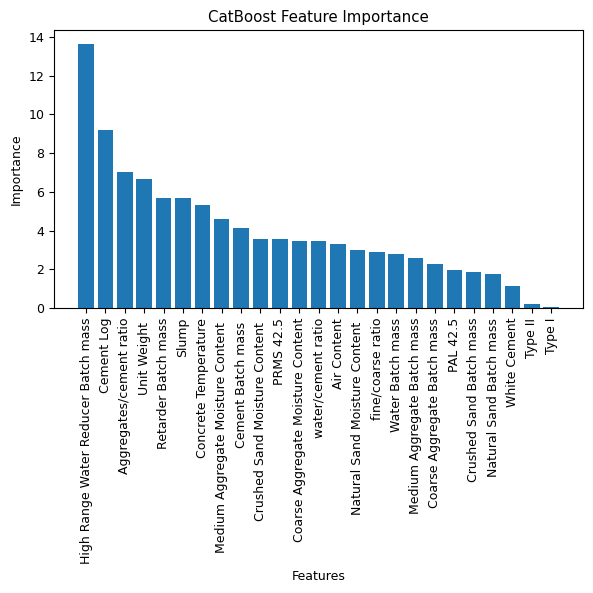

Finish 6º Model - CatBoost...





In [33]:
print("Start 6º Model - CatBoost...")
model_utils.train_and_evaluate_model_CatBoost(imputed_df, config_file)
print("Finish 6º Model - CatBoost...\n\n\n")  

In [ ]:
print("Start 7º Model - HistGradientBoostingRegressor...")
model_utils.train_and_evaluate_model_hgb(imputed_df, config_file)
print("Finish 7º Model - HistGradientBoostingRegressor...\n\n\n") 

Start 7º Model - HistGradientBoostingRegressor...


In [ ]:
print("Start 8º Model - Stacking...")
model_utils.train_and_evaluate_model_stacking(imputed_df, config_file)
print("Finish 8º Model - Stacking...\n\n\n")  

In [ ]:
print("XGboost Grid search with manual cross-validation starting")
# Load and preprocess data
X_train, y_train = model_utils.load_preprocess_and_split_data(imputed_df)

# Perform XGBoost grid search
best_r2, best_params = model_utils.perform_xgboost_grid_search(X_train, y_train, num_folds=5)

In [ ]:
print("Catboost Grid search with manual cross-validation starting")
# Load and preprocess data
X_train, y_train = model_utils.load_preprocess_and_split_data(imputed_df)

# Perform Catboost grid search
best_r2, best_params = model_utils.perform_catboost_grid_search(X_train, y_train,num_folds=5)